In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import csv
import os 
import matplotlib.pyplot as plt

In [2]:
master_df = pd.read_csv("ZIPdf.csv")
master_df["ZIP"] = master_df["ZIP"].astype(str).str.zfill(5)
master_df.set_index("ZIP", inplace=True)

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\3482580346.py:1: DtypeWarning: Columns (0,12) have mixed types. Specify dtype option on import or set low_memory=False.
  master_df = pd.read_csv("ZIPdf.csv")


In [3]:
stats_df = master_df[~master_df["Min Share"].isnull()][["Min Share",
                                                       "Black Share",
                                                       "White Share",
                                                       "Asian Share",
                                                       "Hisp Share",
                                                       "Native Share",
                                                       "W_Avg Emp Min Share",
                                                       "W_Avg Emp Black Share",
                                                       "W_Avg Emp White Share",
                                                       "W_Avg Emp Asian Share",
                                                       "W_Avg Emp Hisp Share",
                                                       "W_Avg Emp Non-Hisp Share",
                                                       "Total Pop",
                                                       "Loans per Emp Bus",
                                                       "Avg Loan Amt per Emp",
                                                       "Loans per Emp Bus_1",
                                                       "Avg Loan Amt per Emp_1",
                                                       "Loans per Emp Bus_2",
                                                       "Avg Loan Amt per Emp_2",
                                                       "Loans per Emp Bus_3",
                                                       "Avg Loan Amt per Emp_3",
                                                       "Advs per Emp Bus",
                                                       "Avg Adv Amt per Emp",
                                                       "EIDL Loans per Emp Bus",
                                                       "Avg EIDL Loan Amt per Emp"
                                                       ]]

In [4]:
def create_fairle_vis(df, x_col, y_cols):
    # Drop NaN values for relevant columns
    df = df.dropna(subset=[x_col] + y_cols)
    
    # Create bins for the x column
    df[f'{x_col} Bin'] = pd.cut(df[x_col], bins=20)
    
    plt.figure(figsize=(14, 6))
    
    for i, y_col in enumerate(y_cols):
        # Calculate mean for each bin
        grouped = df.groupby(f'{x_col} Bin')[y_col].mean().reset_index()
        
        # Create subplot
        plt.subplot(1, len(y_cols), i+1)
        
        # Plot data
        plt.bar(grouped[f'{x_col} Bin'].astype(str), grouped[y_col])
        plt.xticks(rotation=45)
        plt.xlabel(x_col)
        plt.ylabel(f'Mean {y_col}')
        plt.title(f'Mean {y_col} for each {x_col} Bin')

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\2415819737.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x_col} Bin'] = pd.cut(df[x_col], bins=20)


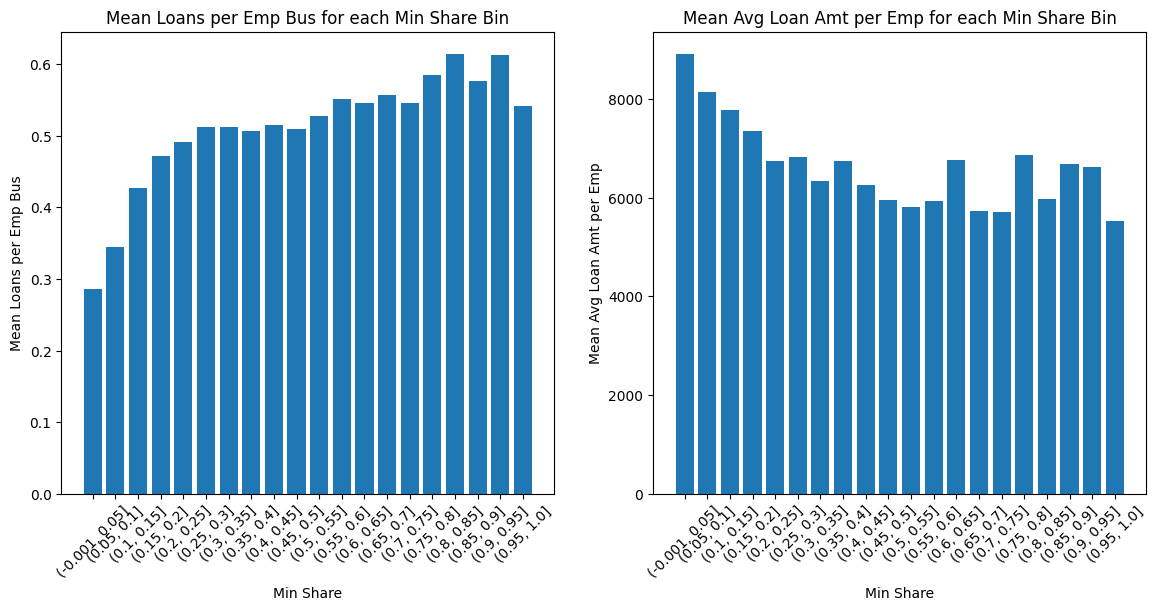

In [5]:
create_fairle_vis(stats_df, "Min Share", ["Loans per Emp Bus", "Avg Loan Amt per Emp"])

In [6]:
def plot_binned_means(df, x_col, y_col, weight_col):
    # Drop NaN values for relevant columns
    df = df.dropna(subset=[x_col, y_col, weight_col])

    # Create bins for the x column
    df[f'{x_col} Bin'] = pd.cut(df[x_col], bins=20)

    # Initialize figure
    plt.figure(figsize=(14, 6))

    # Calculate and plot the unweighted mean for the y-column
    plt.subplot(1, 2, 2)
    grouped_unweighted = df.groupby(f'{x_col} Bin')[y_col].mean().reset_index()
    plt.bar(grouped_unweighted[f'{x_col} Bin'].astype(str), grouped_unweighted[y_col])
    plt.xticks(rotation=45)
    plt.xlabel(x_col)
    plt.ylabel(f'Mean {y_col}')
    plt.title(f'Unweighted Mean {y_col} for each {x_col} Bin')

    # Calculate and plot the weighted mean for the y-column
    plt.subplot(1, 2, 1)
    df['Weighted'] = df[y_col] * df[weight_col]
    grouped_weighted = df.groupby(f'{x_col} Bin').apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
    plt.bar(grouped_weighted[f'{x_col} Bin'].astype(str), grouped_weighted[f'Weighted Mean {y_col}'])
    plt.xticks(rotation=45)
    plt.xlabel(x_col)
    plt.ylabel(f'Weighted Mean {y_col}')
    plt.title(f'Weighted Mean {y_col} for each {x_col} Bin')

    plt.tight_layout()
    plt.show()

PPP Loans

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x_col} Bin'] = pd.cut(df[x_col], bins=20)
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weighted'] = df[y_col] * df[weight_col]


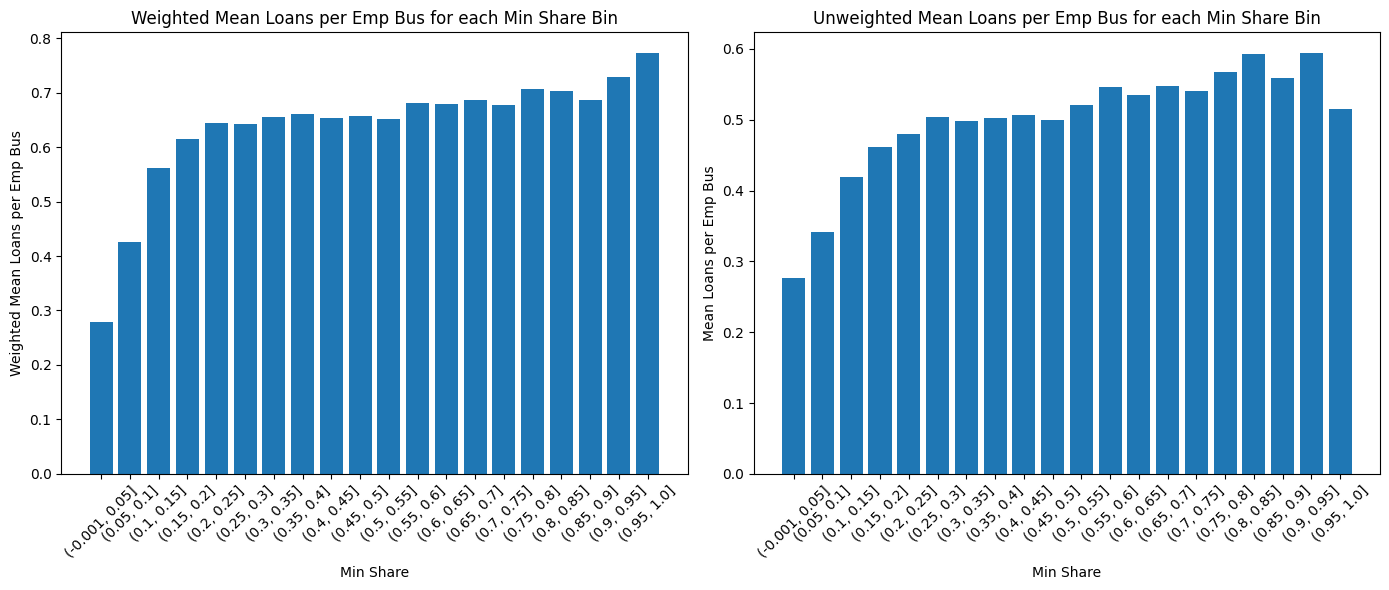

In [7]:
plot_binned_means(stats_df, "Min Share", "Loans per Emp Bus", "Total Pop")

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x_col} Bin'] = pd.cut(df[x_col], bins=20)
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weighted'] = df[y_col] * df[weight_col]


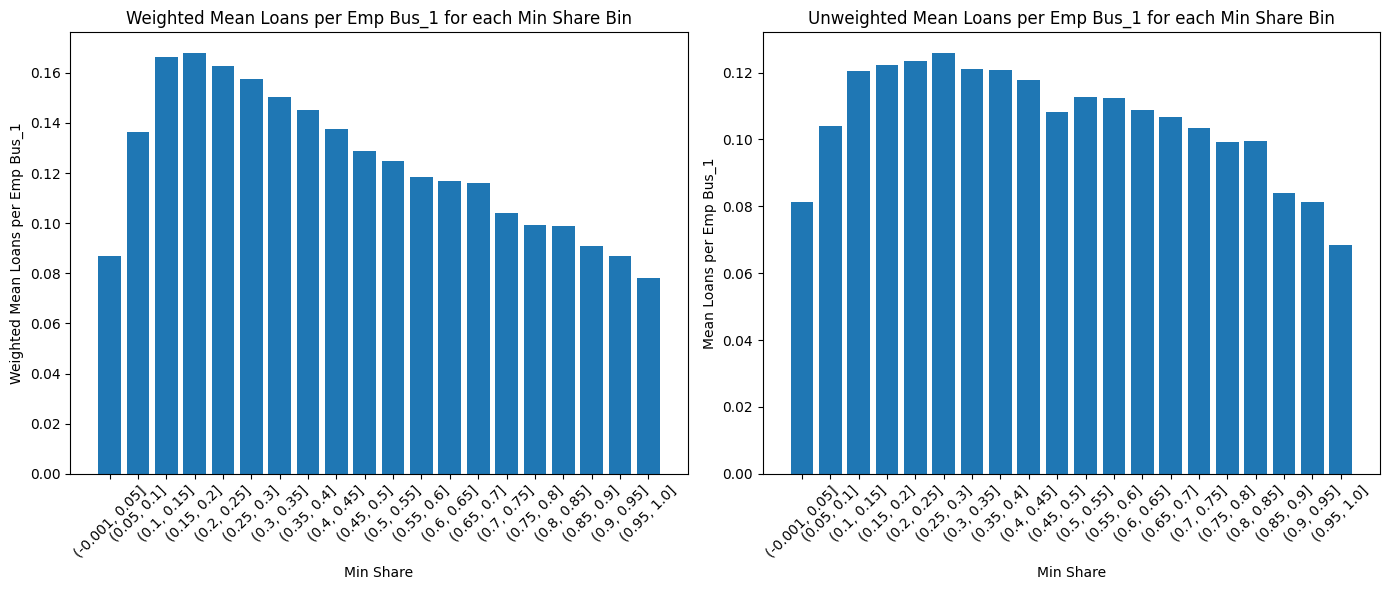

In [8]:
plot_binned_means(stats_df, "Min Share", "Loans per Emp Bus_1", "Total Pop")

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x_col} Bin'] = pd.cut(df[x_col], bins=20)
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weighted'] = df[y_col] * df[weight_col]


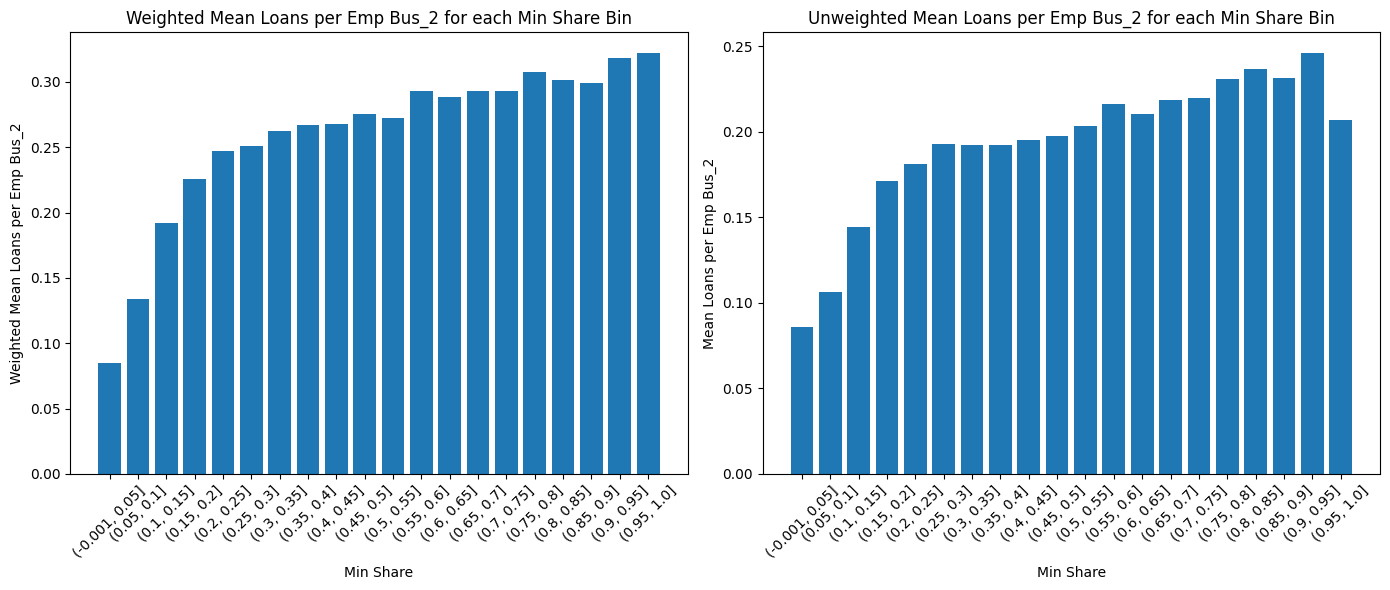

In [9]:
plot_binned_means(stats_df, "Min Share", "Loans per Emp Bus_2", "Total Pop")

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x_col} Bin'] = pd.cut(df[x_col], bins=20)
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weighted'] = df[y_col] * df[weight_col]


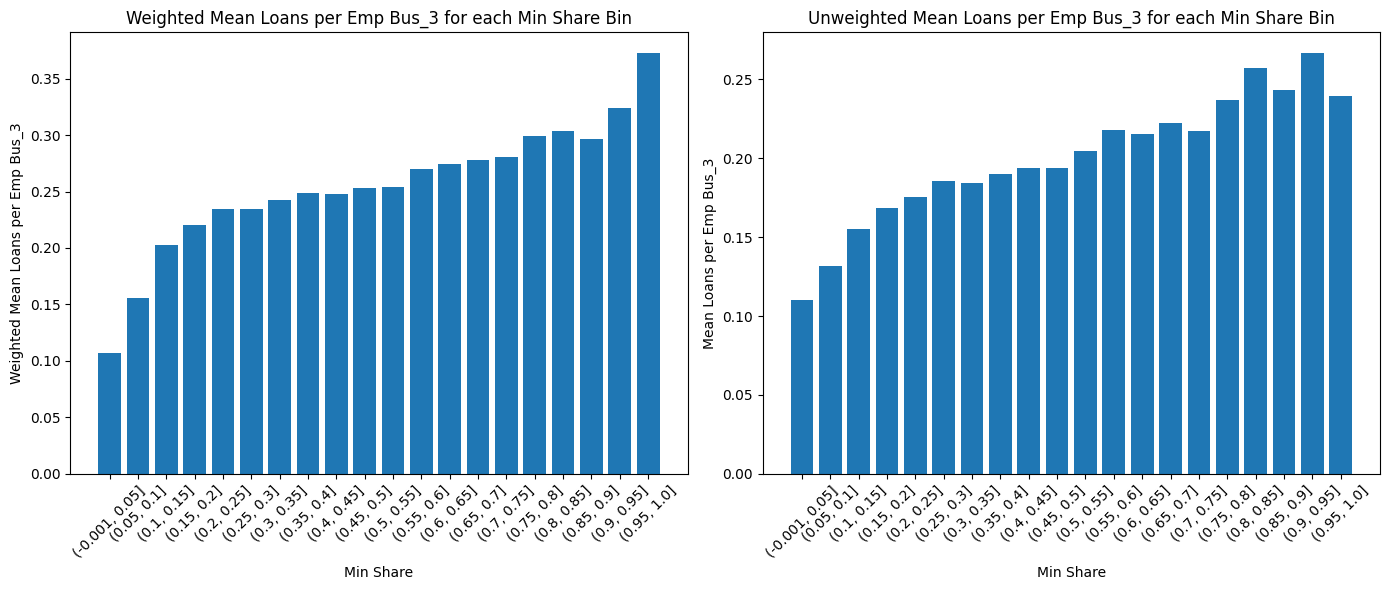

In [10]:
plot_binned_means(stats_df, "Min Share", "Loans per Emp Bus_3", "Total Pop")

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x_col} Bin'] = pd.cut(df[x_col], bins=20)
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weighted'] = df[y_col] * df[weight_col]


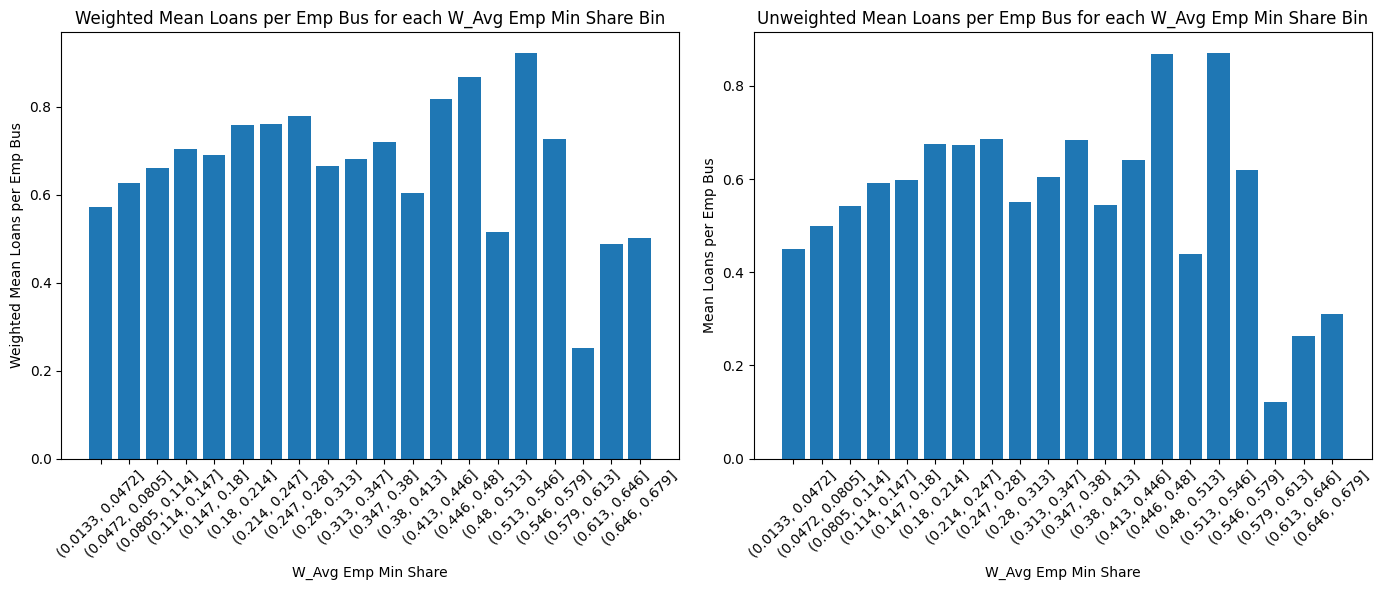

In [11]:
plot_binned_means(stats_df, "W_Avg Emp Min Share", "Loans per Emp Bus", "Total Pop")

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x_col} Bin'] = pd.cut(df[x_col], bins=20)
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weighted'] = df[y_col] * df[weight_col]


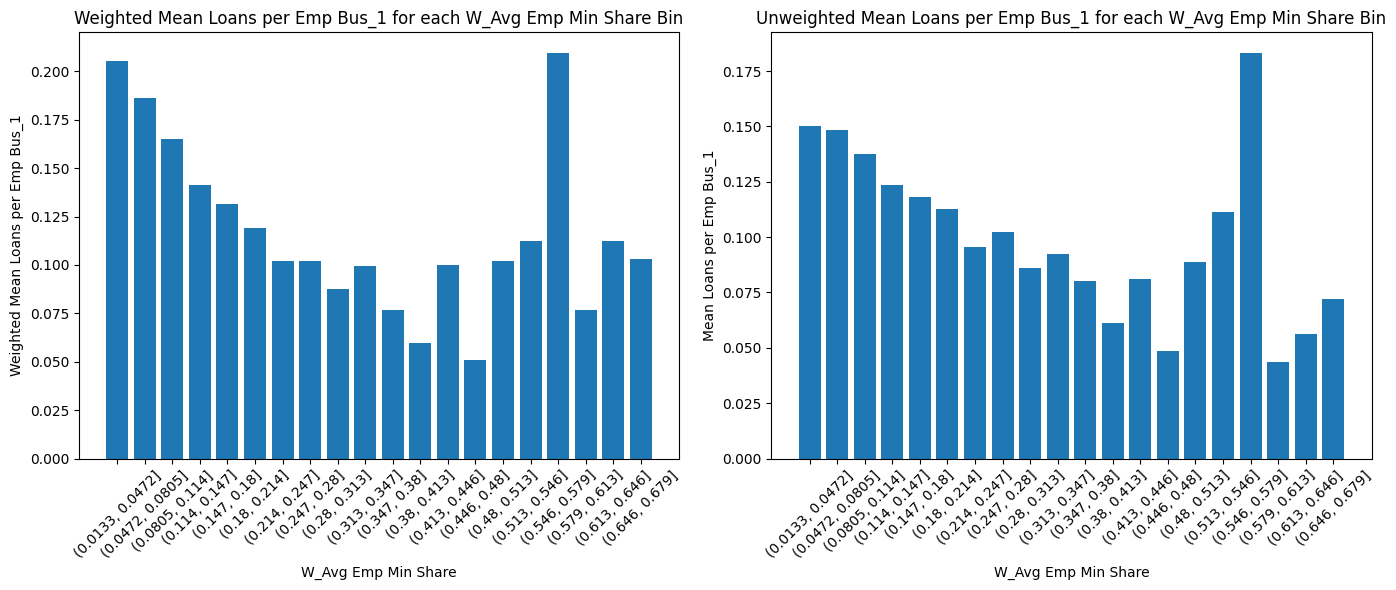

In [12]:
plot_binned_means(stats_df, "W_Avg Emp Min Share", "Loans per Emp Bus_1", "Total Pop")

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x_col} Bin'] = pd.cut(df[x_col], bins=20)
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weighted'] = df[y_col] * df[weight_col]


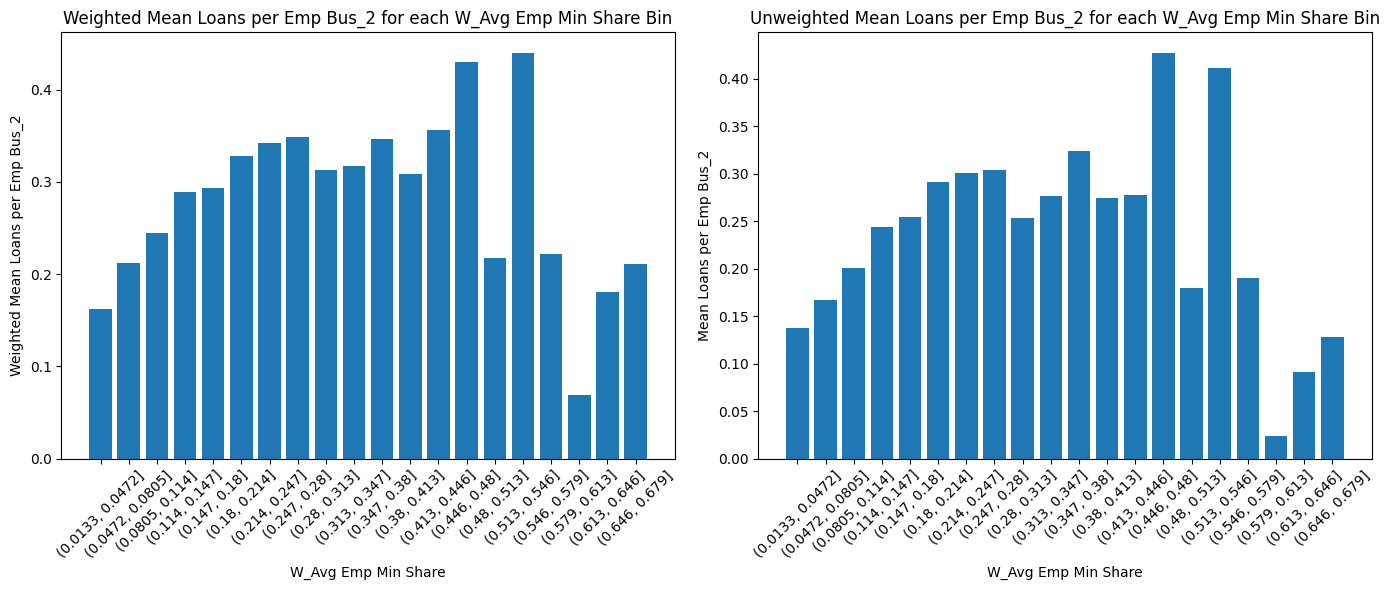

In [13]:
plot_binned_means(stats_df, "W_Avg Emp Min Share", "Loans per Emp Bus_2", "Total Pop")

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x_col} Bin'] = pd.cut(df[x_col], bins=20)
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weighted'] = df[y_col] * df[weight_col]


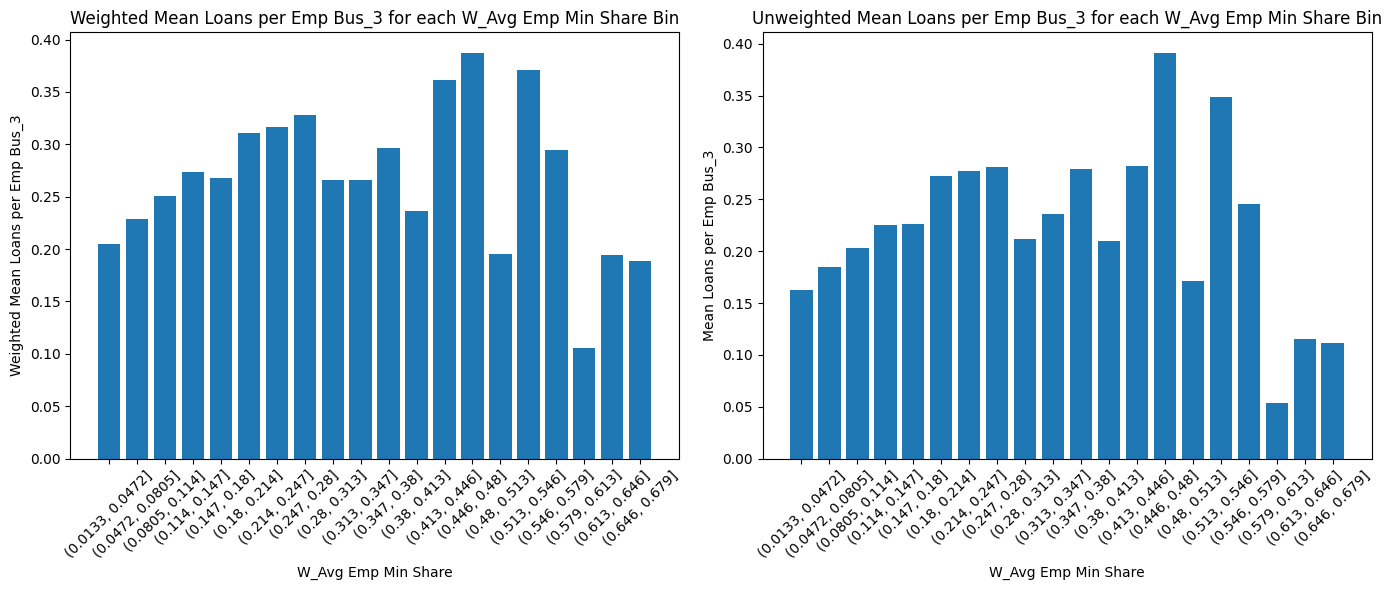

In [14]:
plot_binned_means(stats_df, "W_Avg Emp Min Share", "Loans per Emp Bus_3", "Total Pop")

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x_col} Bin'] = pd.cut(df[x_col], bins=20)
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weighted'] = df[y_col] * df[weight_col]


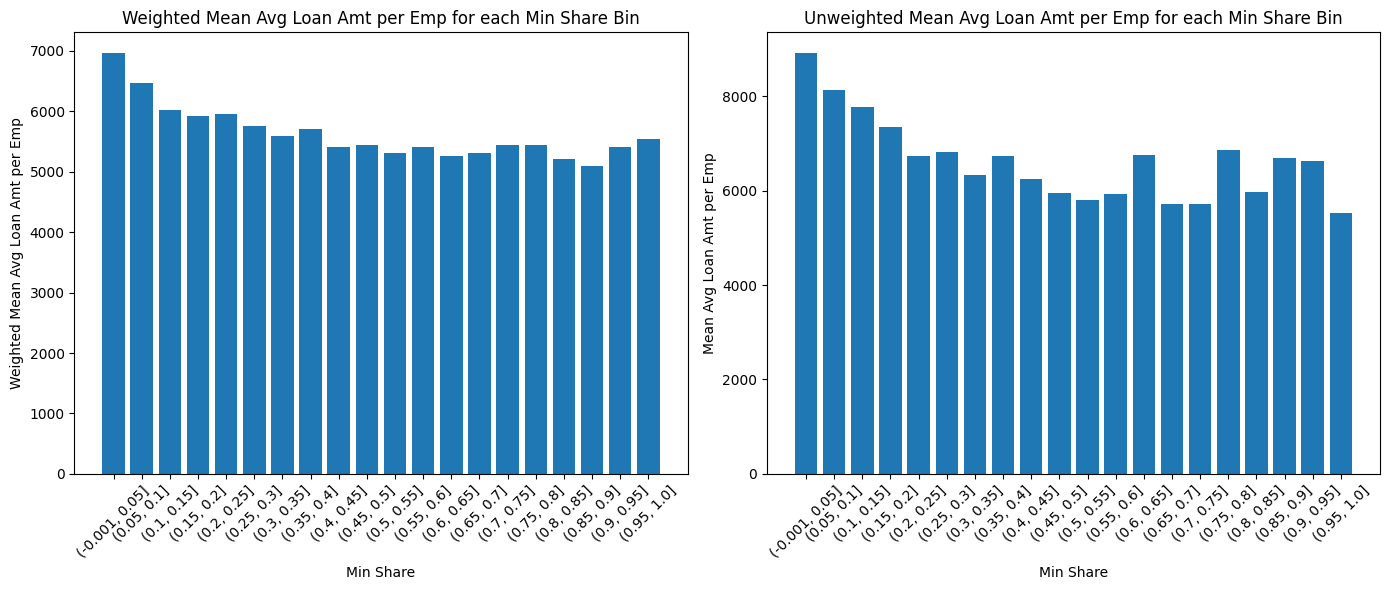

In [15]:
plot_binned_means(stats_df, "Min Share", "Avg Loan Amt per Emp", "Total Pop")

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x_col} Bin'] = pd.cut(df[x_col], bins=20)
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weighted'] = df[y_col] * df[weight_col]


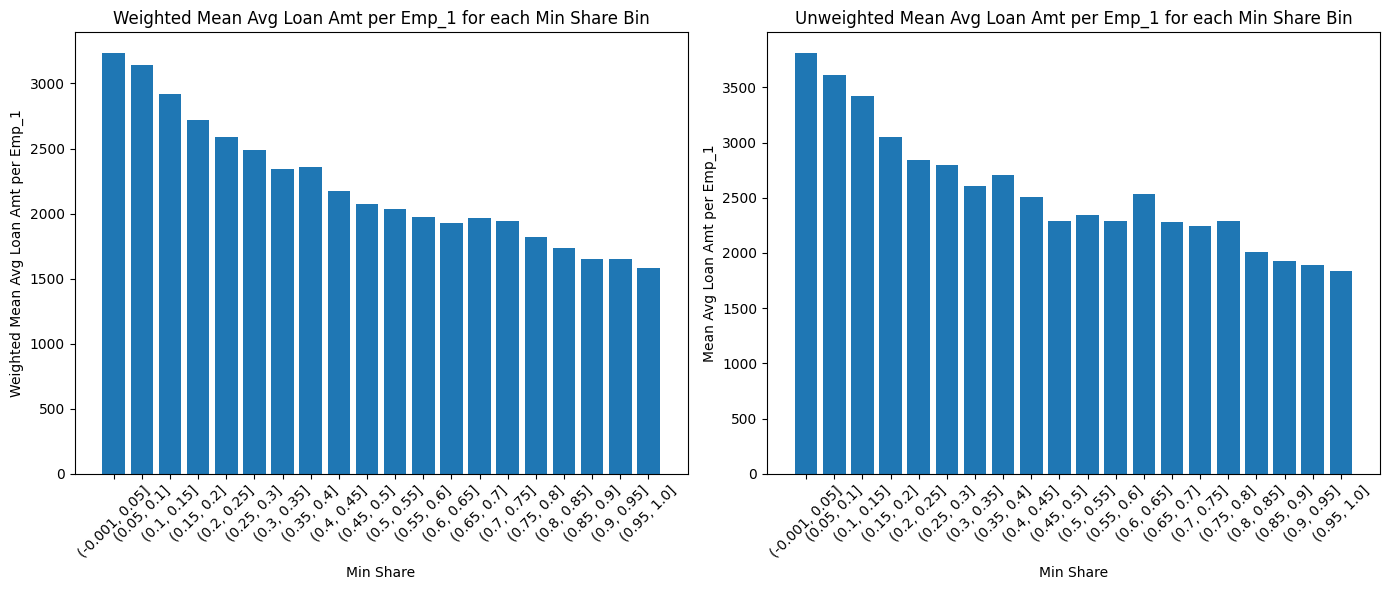

In [16]:
plot_binned_means(stats_df, "Min Share", "Avg Loan Amt per Emp_1", "Total Pop")

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x_col} Bin'] = pd.cut(df[x_col], bins=20)
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weighted'] = df[y_col] * df[weight_col]


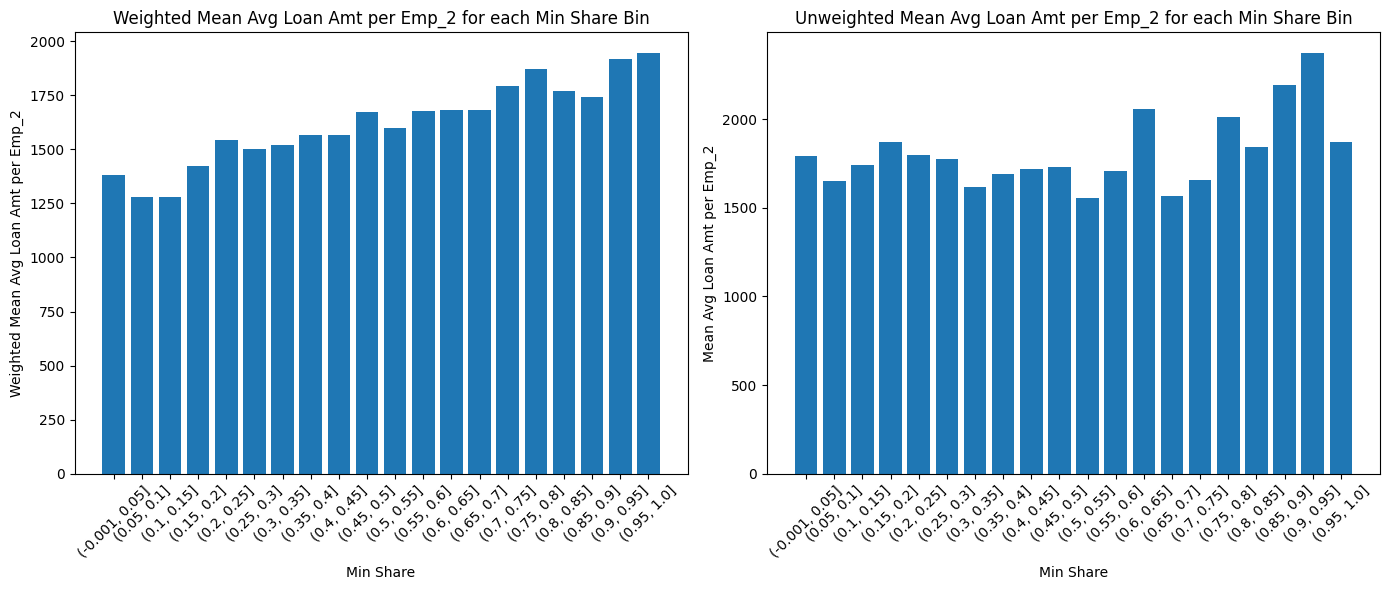

In [17]:
plot_binned_means(stats_df, "Min Share", "Avg Loan Amt per Emp_2", "Total Pop")

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x_col} Bin'] = pd.cut(df[x_col], bins=20)
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weighted'] = df[y_col] * df[weight_col]


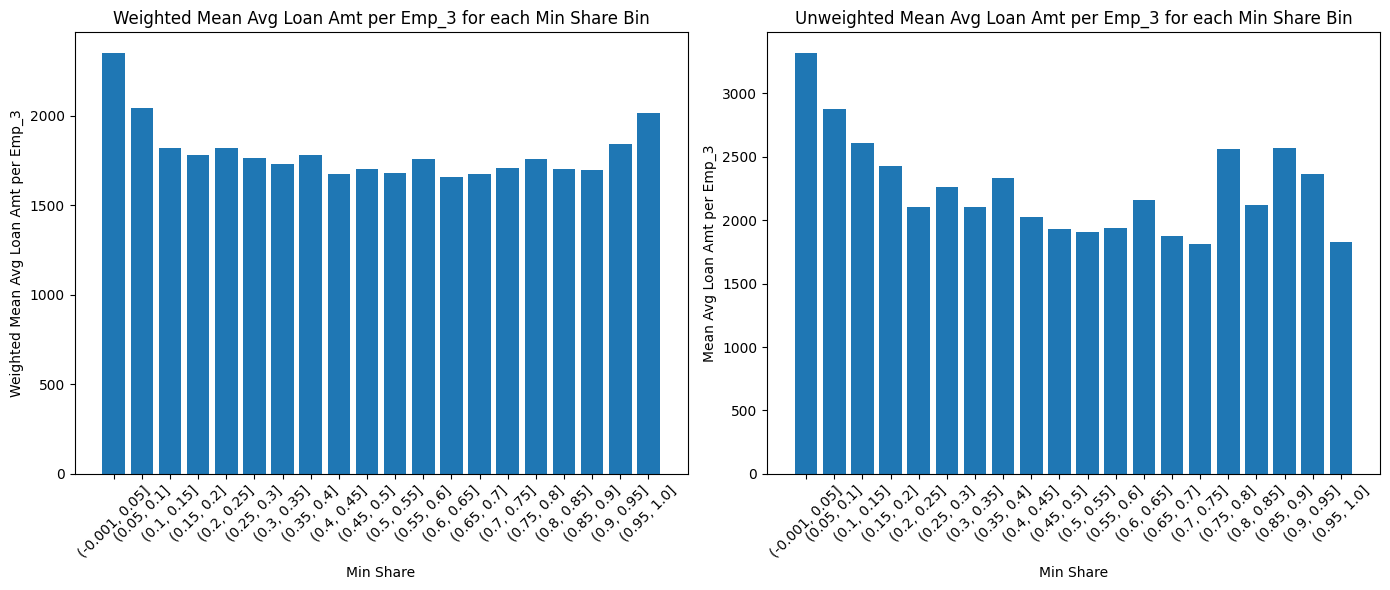

In [18]:
plot_binned_means(stats_df, "Min Share", "Avg Loan Amt per Emp_3", "Total Pop")

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x_col} Bin'] = pd.cut(df[x_col], bins=20)
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weighted'] = df[y_col] * df[weight_col]


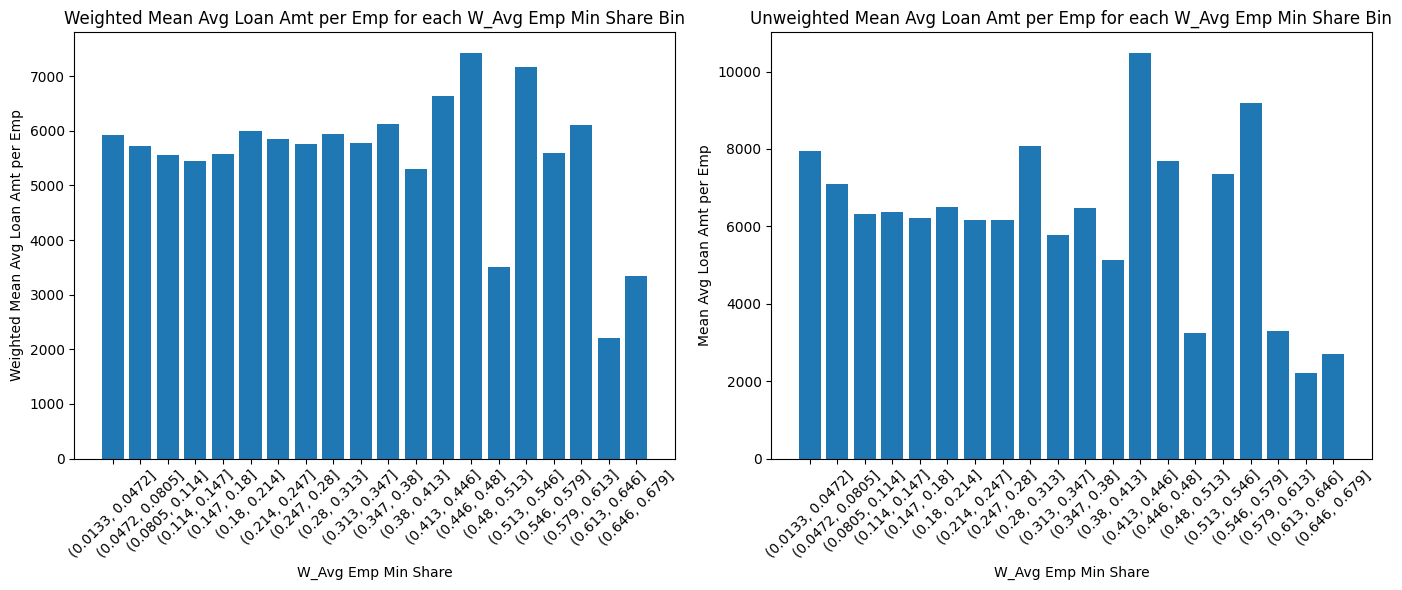

In [19]:
plot_binned_means(stats_df, "W_Avg Emp Min Share", "Avg Loan Amt per Emp", "Total Pop")

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x_col} Bin'] = pd.cut(df[x_col], bins=20)
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weighted'] = df[y_col] * df[weight_col]


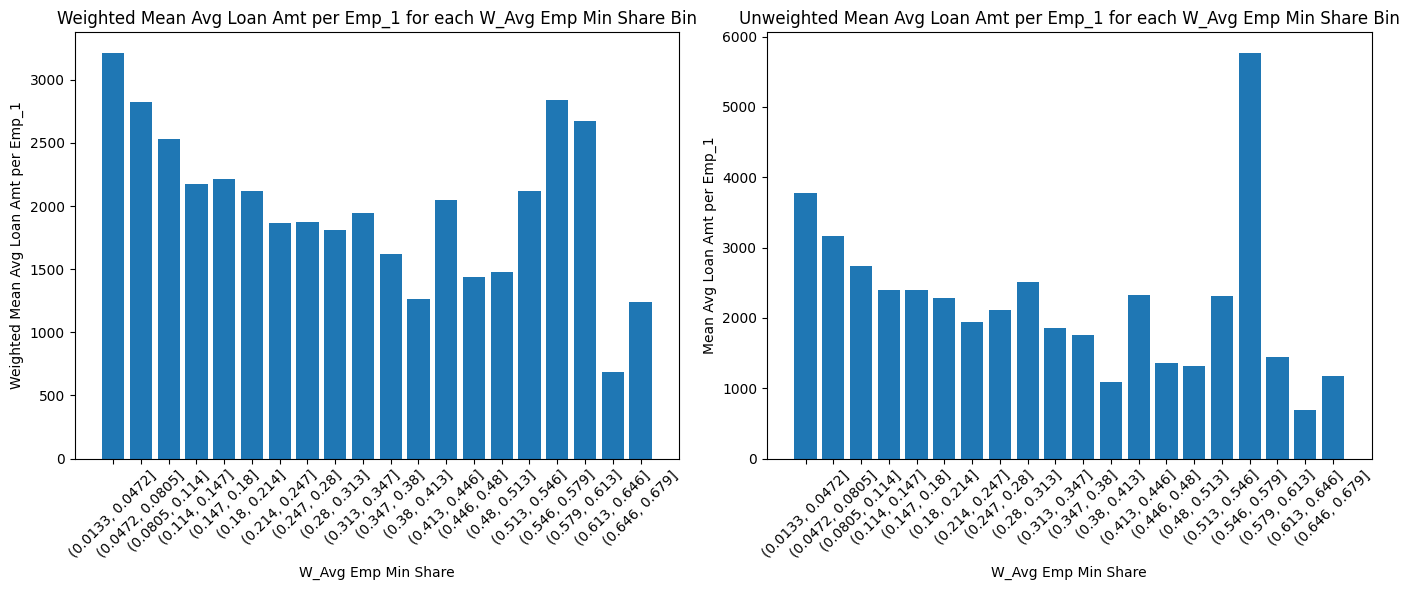

In [20]:
plot_binned_means(stats_df, "W_Avg Emp Min Share", "Avg Loan Amt per Emp_1", "Total Pop")

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x_col} Bin'] = pd.cut(df[x_col], bins=20)
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weighted'] = df[y_col] * df[weight_col]


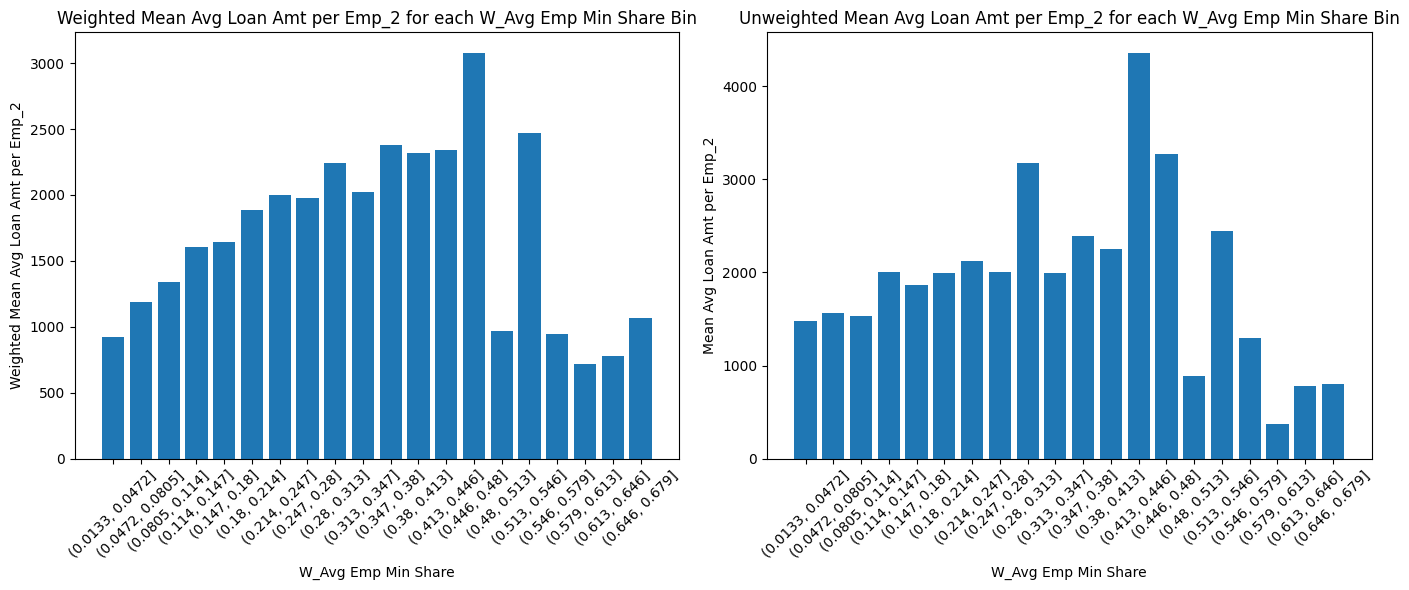

In [21]:
plot_binned_means(stats_df, "W_Avg Emp Min Share", "Avg Loan Amt per Emp_2", "Total Pop")

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x_col} Bin'] = pd.cut(df[x_col], bins=20)
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weighted'] = df[y_col] * df[weight_col]


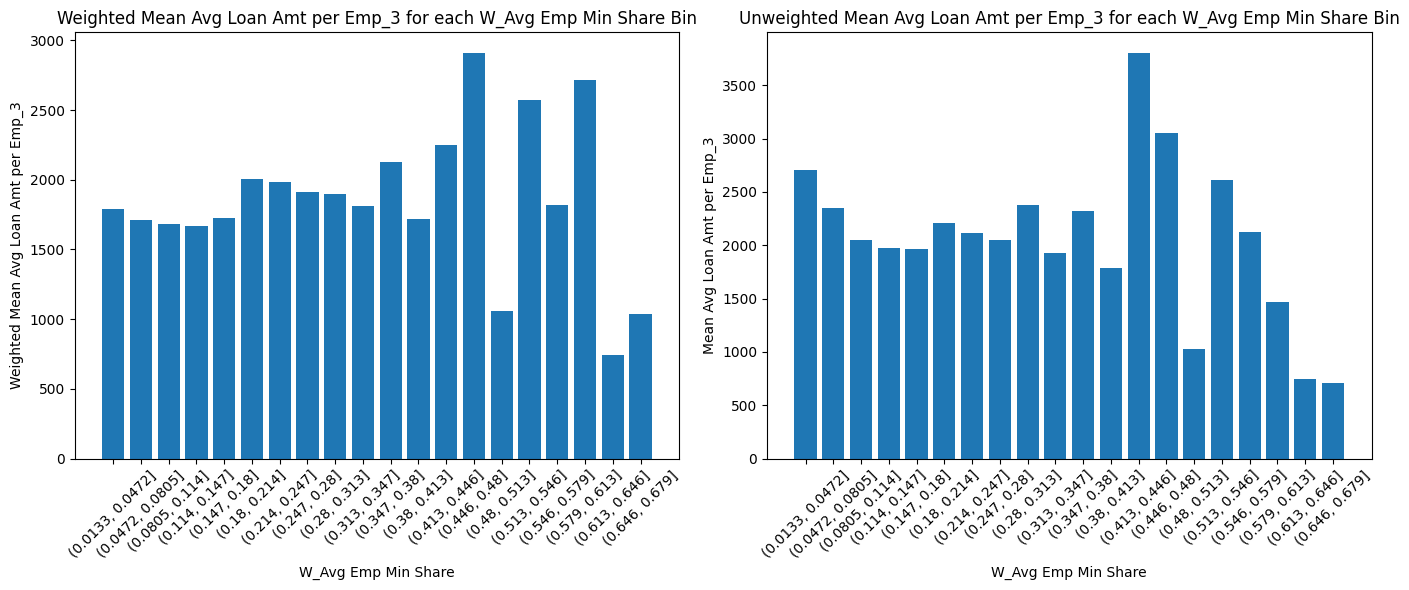

In [22]:
plot_binned_means(stats_df, "W_Avg Emp Min Share", "Avg Loan Amt per Emp_3", "Total Pop")

EIDL Loans

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x_col} Bin'] = pd.cut(df[x_col], bins=20)
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weighted'] = df[y_col] * df[weight_col]


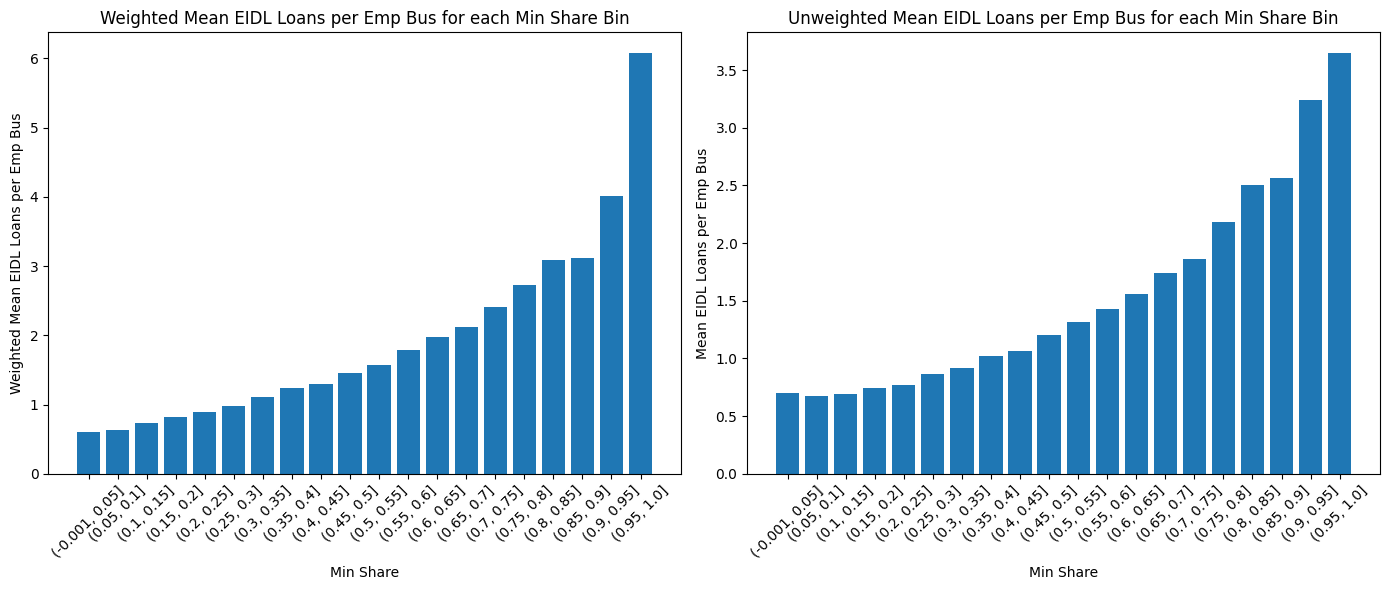

In [23]:
plot_binned_means(stats_df, "Min Share", "EIDL Loans per Emp Bus", "Total Pop")

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x_col} Bin'] = pd.cut(df[x_col], bins=20)
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weighted'] = df[y_col] * df[weight_col]


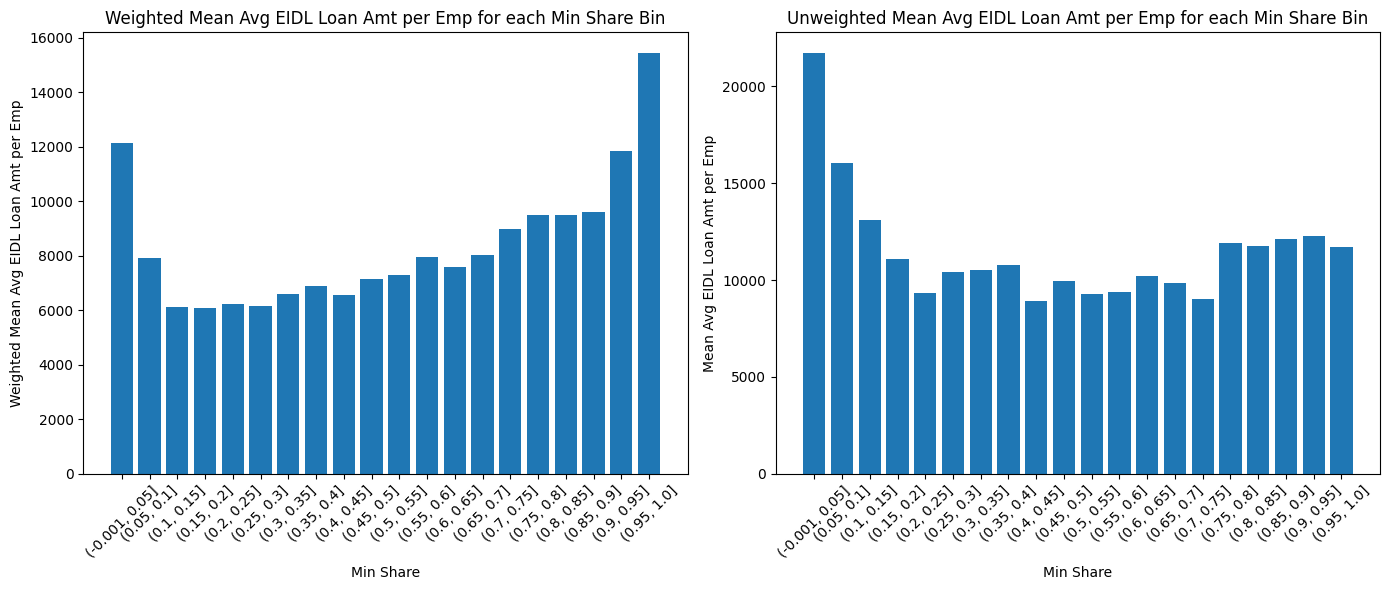

In [24]:
plot_binned_means(stats_df, "Min Share", "Avg EIDL Loan Amt per Emp", "Total Pop")

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x_col} Bin'] = pd.cut(df[x_col], bins=20)
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weighted'] = df[y_col] * df[weight_col]


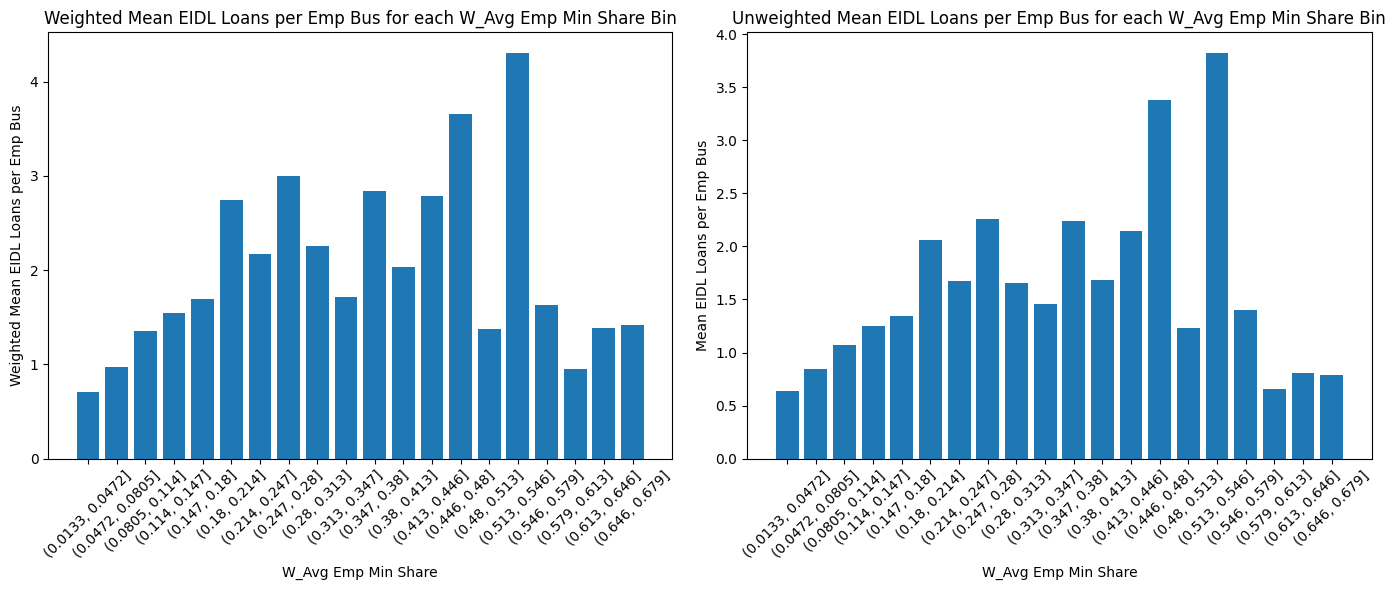

In [25]:
plot_binned_means(stats_df, "W_Avg Emp Min Share", "EIDL Loans per Emp Bus", "Total Pop")

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x_col} Bin'] = pd.cut(df[x_col], bins=20)
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weighted'] = df[y_col] * df[weight_col]


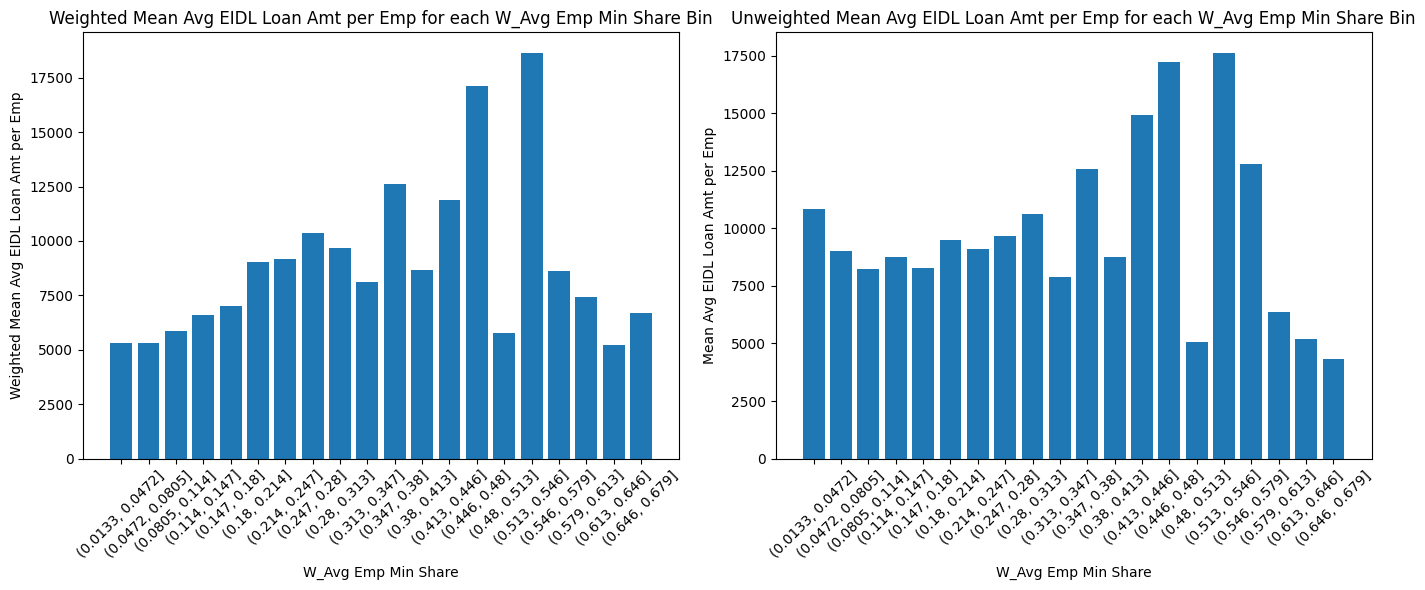

In [26]:
plot_binned_means(stats_df, "W_Avg Emp Min Share", "Avg EIDL Loan Amt per Emp", "Total Pop")

EIDL Advances

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x_col} Bin'] = pd.cut(df[x_col], bins=20)
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weighted'] = df[y_col] * df[weight_col]


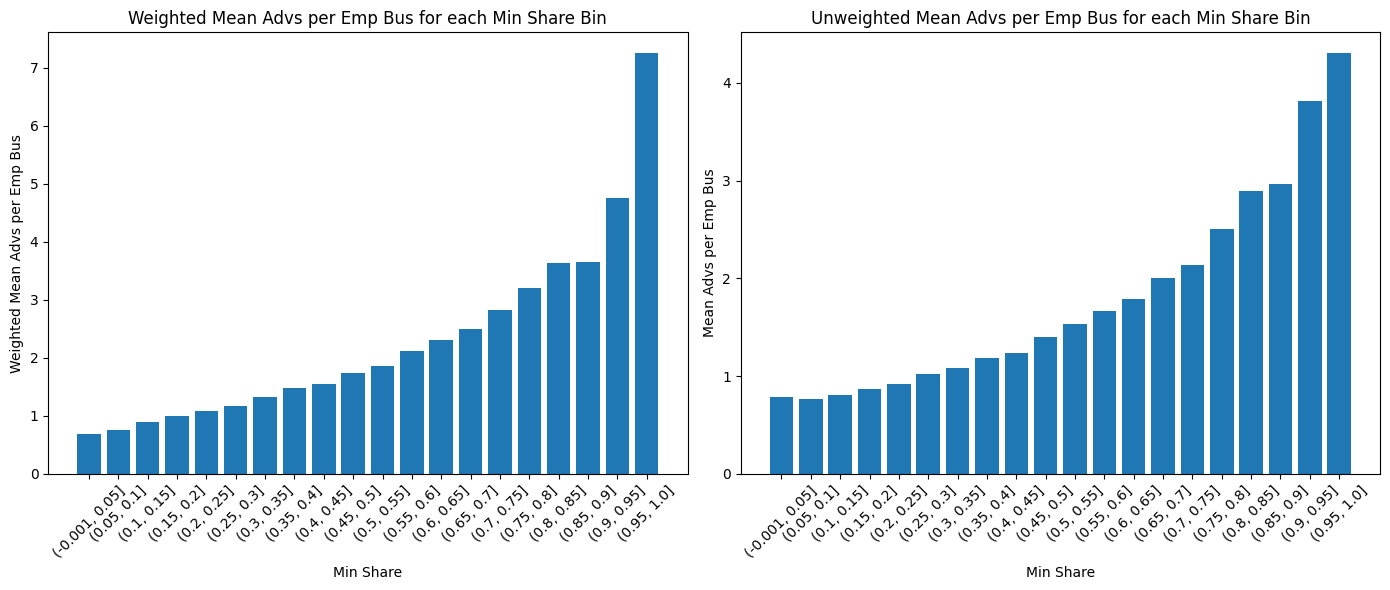

In [27]:
plot_binned_means(stats_df, "Min Share", "Advs per Emp Bus", "Total Pop")

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x_col} Bin'] = pd.cut(df[x_col], bins=20)
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weighted'] = df[y_col] * df[weight_col]


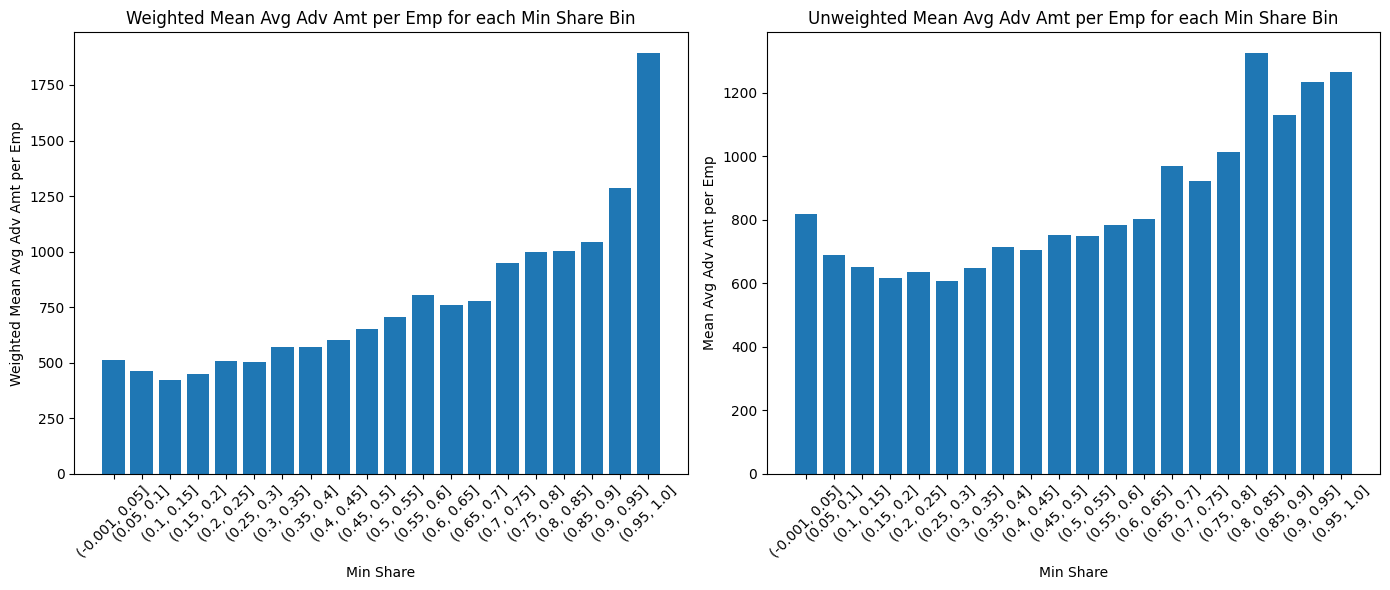

In [28]:
plot_binned_means(stats_df, "Min Share", "Avg Adv Amt per Emp", "Total Pop")

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x_col} Bin'] = pd.cut(df[x_col], bins=20)
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weighted'] = df[y_col] * df[weight_col]


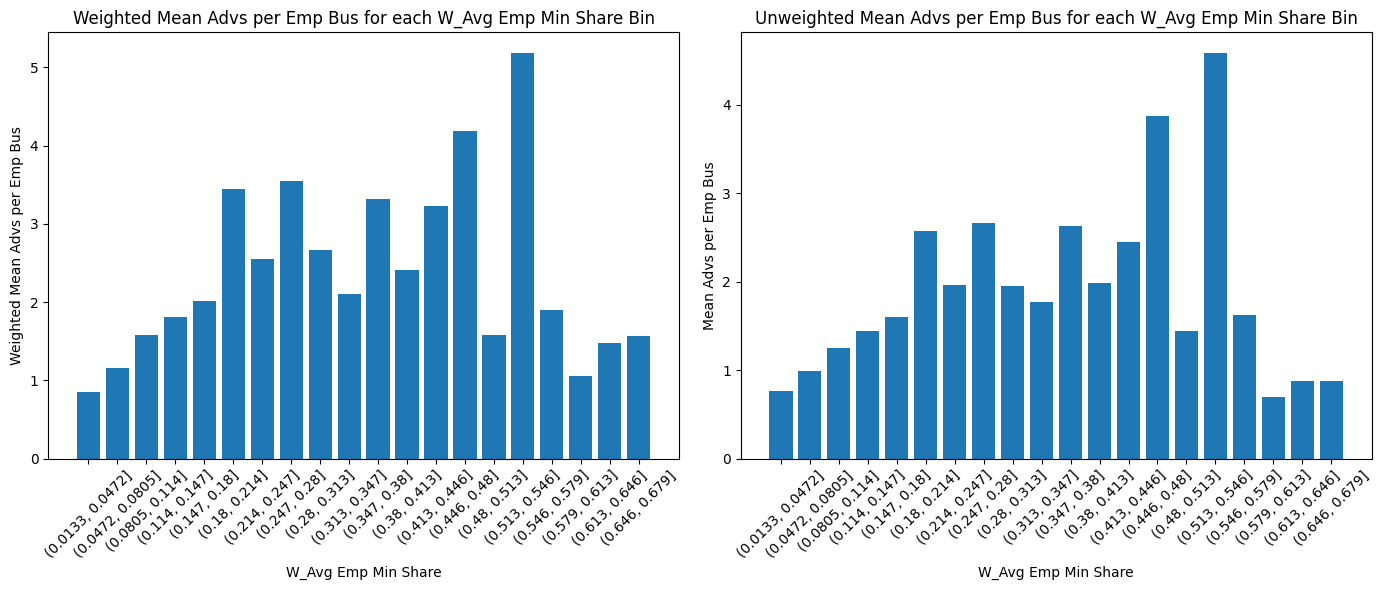

In [29]:
plot_binned_means(stats_df, "W_Avg Emp Min Share", "Advs per Emp Bus", "Total Pop")

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x_col} Bin'] = pd.cut(df[x_col], bins=20)
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\999328634.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weighted'] = df[y_col] * df[weight_col]


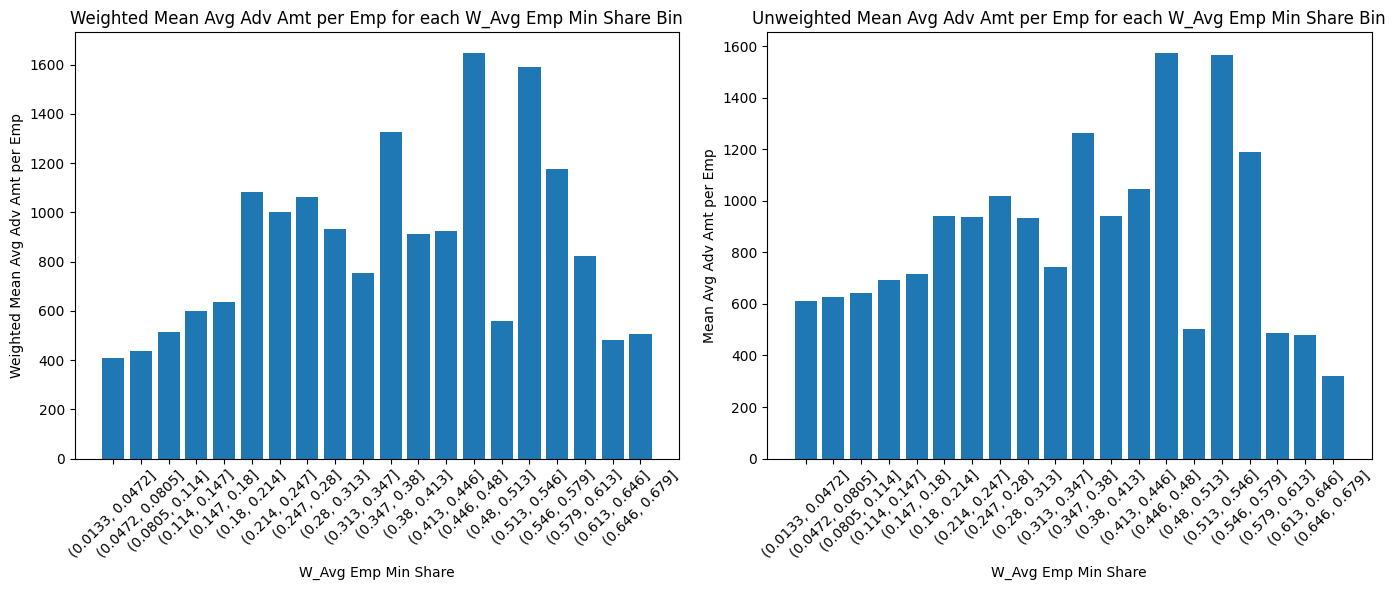

In [30]:
plot_binned_means(stats_df, "W_Avg Emp Min Share", "Avg Adv Amt per Emp", "Total Pop")

Race breakdowns

In [31]:
def plot_multi_binned_means(df, x_cols, y_col, weight_col):
    # Create a copy of the DataFrame to avoid modifying the original DataFrame
    df = df.copy()
    
    # Drop NaN values for relevant columns
    cols_to_check = x_cols + [y_col, weight_col]
    df.dropna(subset=cols_to_check, inplace=True)
    
    # Initialize the figure
    plt.figure(figsize=(14, 6))
    
    # Loop for Unweighted and Weighted
    for i, calc_type in enumerate(['Unweighted', 'Weighted']):
        
        plt.subplot(1, 2, i + 1)
        
        for x_col in x_cols:
            # Create bins for the x column
            bin_label = f'{x_col} Bin'
            df[bin_label] = pd.cut(df[x_col], bins=20)
            
            if calc_type == 'Weighted':
                # Calculate weighted mean for each bin
                df['Weighted'] = df[y_col] * df[weight_col]
                grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
            else:
                # Calculate unweighted mean for each bin
                grouped = df.groupby(bin_label)[y_col].mean().reset_index()
            
            plt.plot(grouped[bin_label].astype(str), grouped[grouped.columns[-1]], label=f'{x_col} ({calc_type})')
            
        plt.xticks(rotation=45)
        plt.xlabel('Bins')
        plt.ylabel(f'{calc_type} Mean {y_col}')
        plt.title(f'{calc_type} Mean {y_col} for Multiple X Variables')
        plt.legend()

    plt.tight_layout()
    plt.show()


C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')


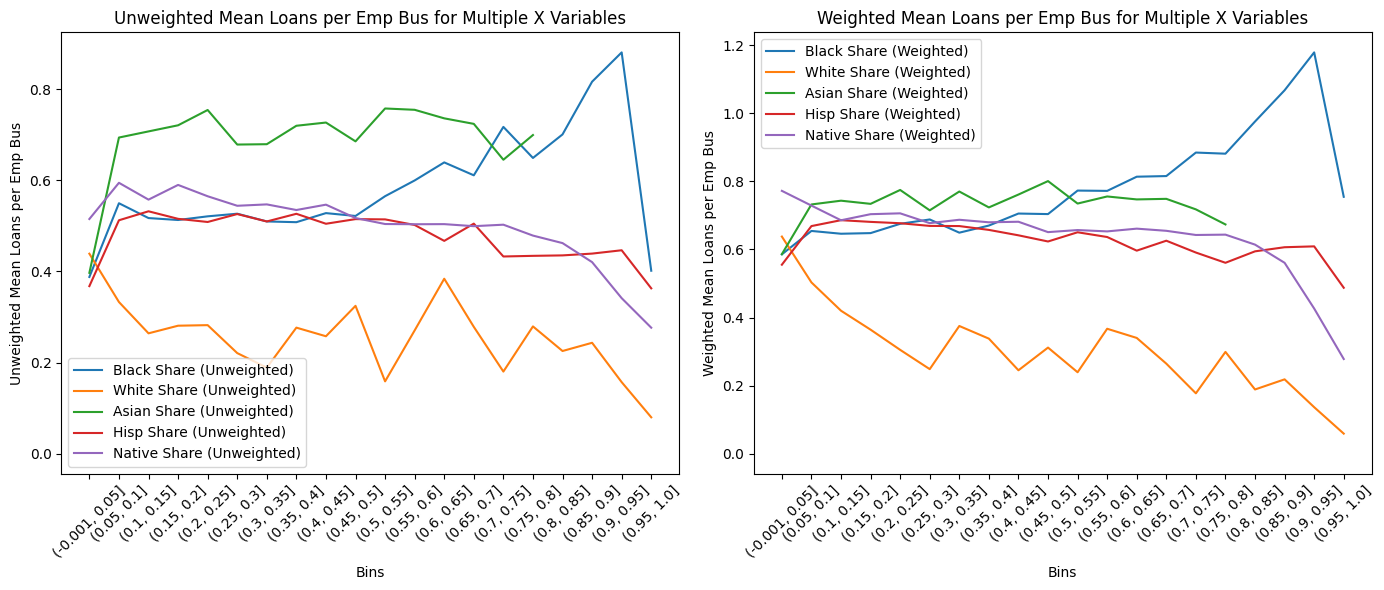

In [32]:
plot_multi_binned_means(stats_df, ["Black Share",
                             "White Share",
                             "Asian Share",
                             "Hisp Share",
                             "Native Share"], "Loans per Emp Bus", "Total Pop")

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')


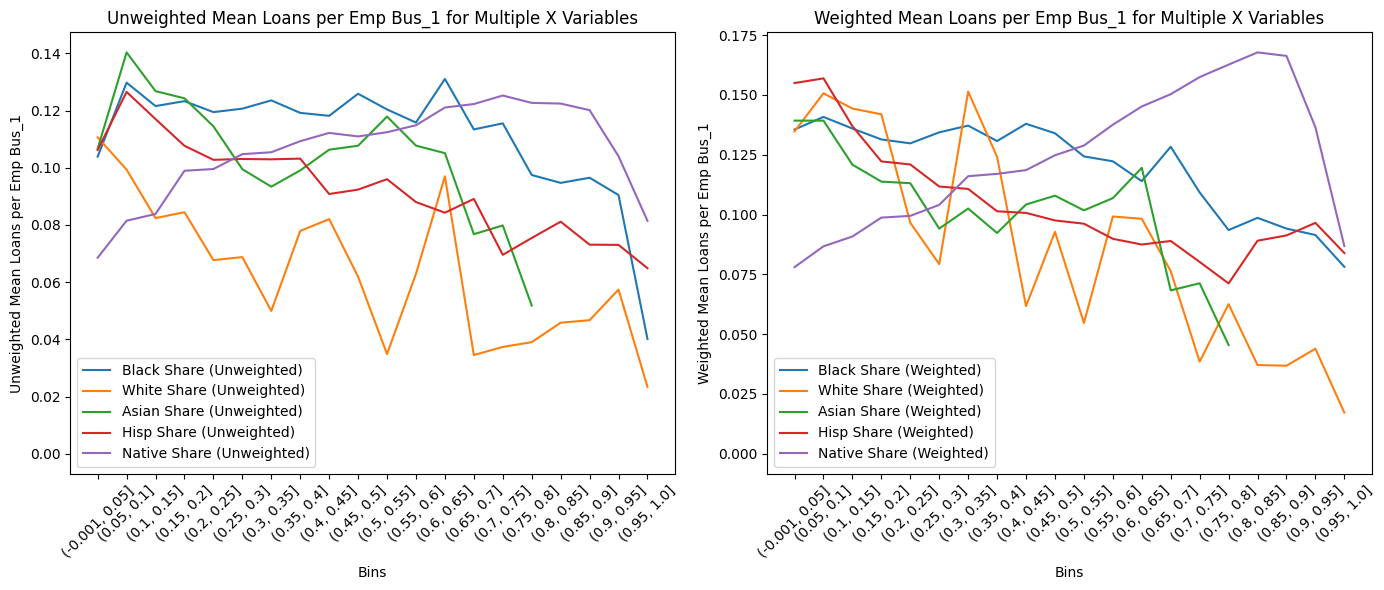

In [33]:
plot_multi_binned_means(stats_df, ["Black Share",
                             "White Share",
                             "Asian Share",
                             "Hisp Share",
                             "Native Share"], "Loans per Emp Bus_1", "Total Pop")

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')


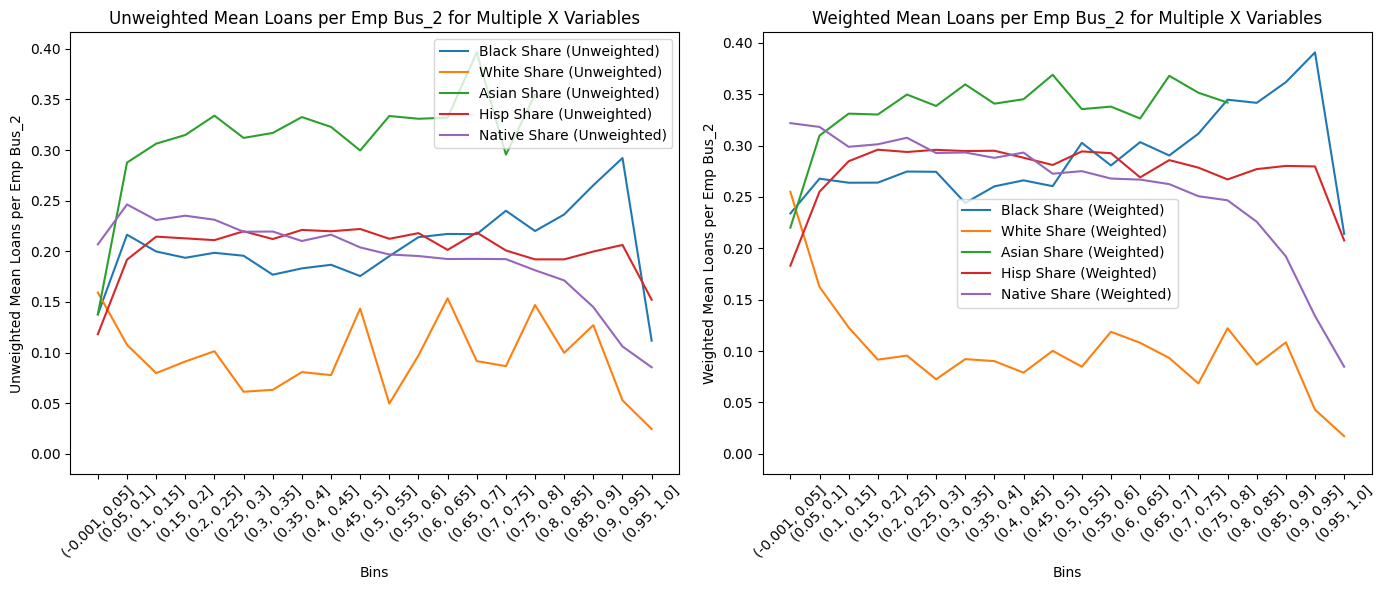

In [34]:
plot_multi_binned_means(stats_df, ["Black Share",
                             "White Share",
                             "Asian Share",
                             "Hisp Share",
                             "Native Share"], "Loans per Emp Bus_2", "Total Pop")

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')


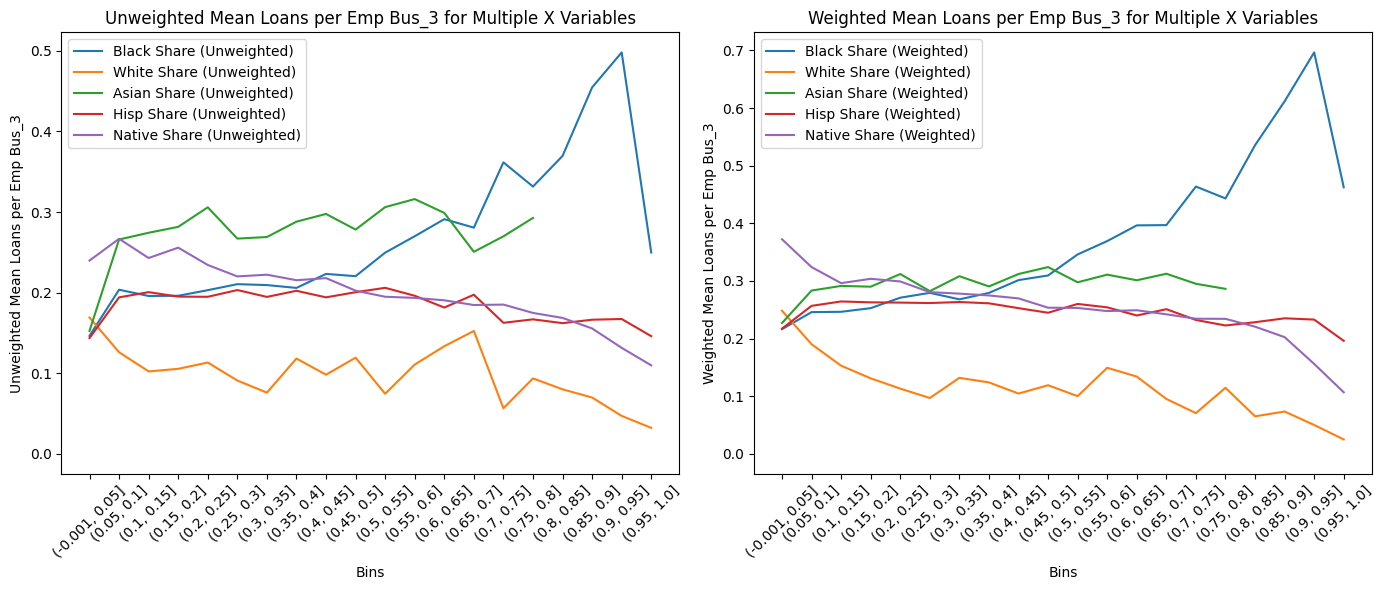

In [35]:
plot_multi_binned_means(stats_df, ["Black Share",
                             "White Share",
                             "Asian Share",
                             "Hisp Share",
                             "Native Share"], "Loans per Emp Bus_3", "Total Pop")

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col

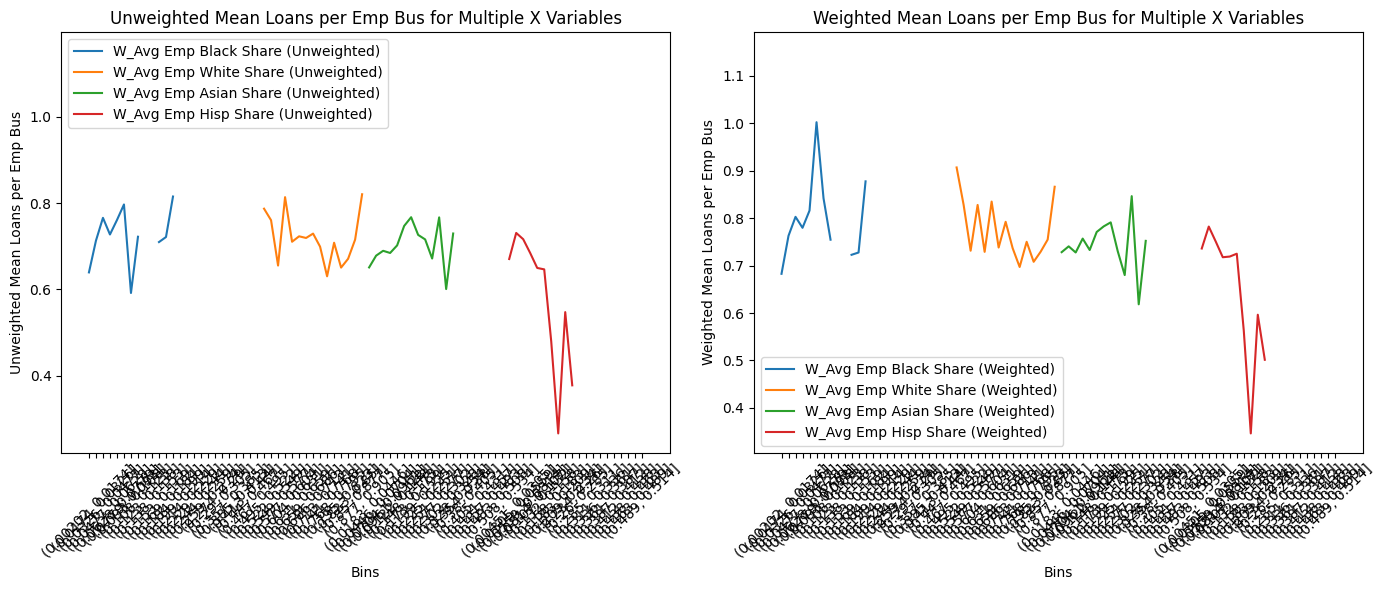

In [36]:
plot_multi_binned_means(stats_df, ["W_Avg Emp Black Share",
                                   "W_Avg Emp White Share",
                                   "W_Avg Emp Asian Share",
                                   "W_Avg Emp Hisp Share"], "Loans per Emp Bus", "Total Pop")

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col

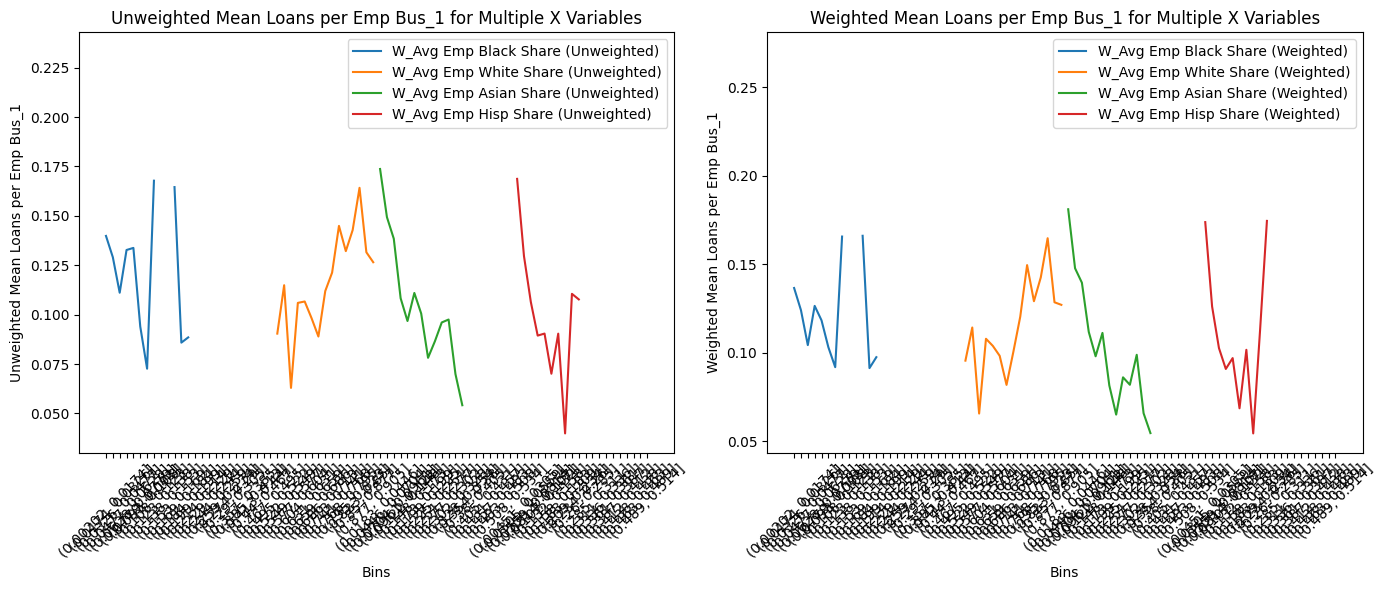

In [37]:
plot_multi_binned_means(stats_df, ["W_Avg Emp Black Share",
                                   "W_Avg Emp White Share",
                                   "W_Avg Emp Asian Share",
                                   "W_Avg Emp Hisp Share"], "Loans per Emp Bus_1", "Total Pop")

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col

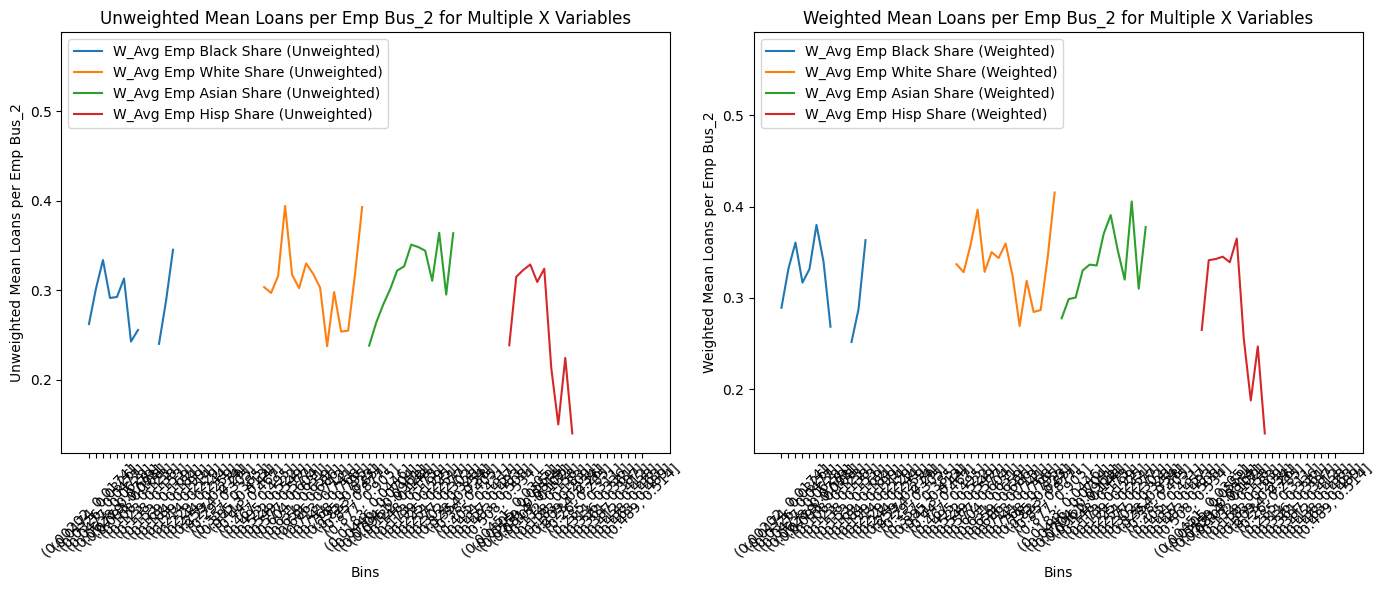

In [38]:
plot_multi_binned_means(stats_df, ["W_Avg Emp Black Share",
                                   "W_Avg Emp White Share",
                                   "W_Avg Emp Asian Share",
                                   "W_Avg Emp Hisp Share"], "Loans per Emp Bus_2", "Total Pop")

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col

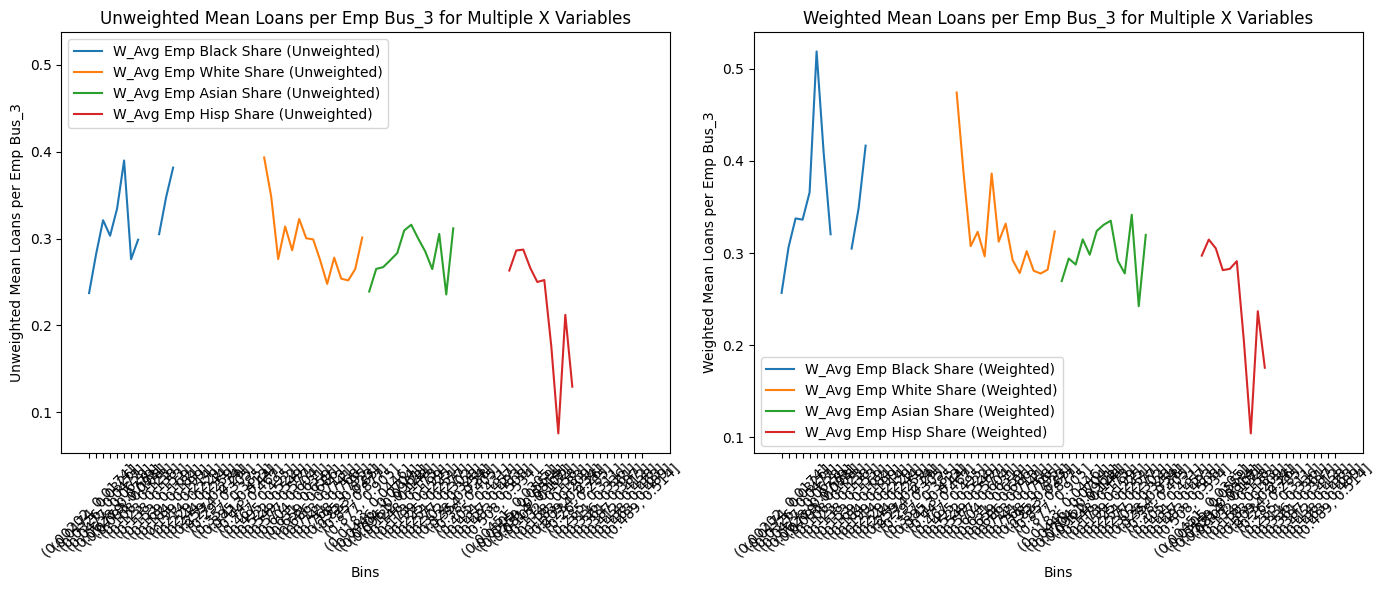

In [39]:
plot_multi_binned_means(stats_df, ["W_Avg Emp Black Share",
                                   "W_Avg Emp White Share",
                                   "W_Avg Emp Asian Share",
                                   "W_Avg Emp Hisp Share"], "Loans per Emp Bus_3", "Total Pop")

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')


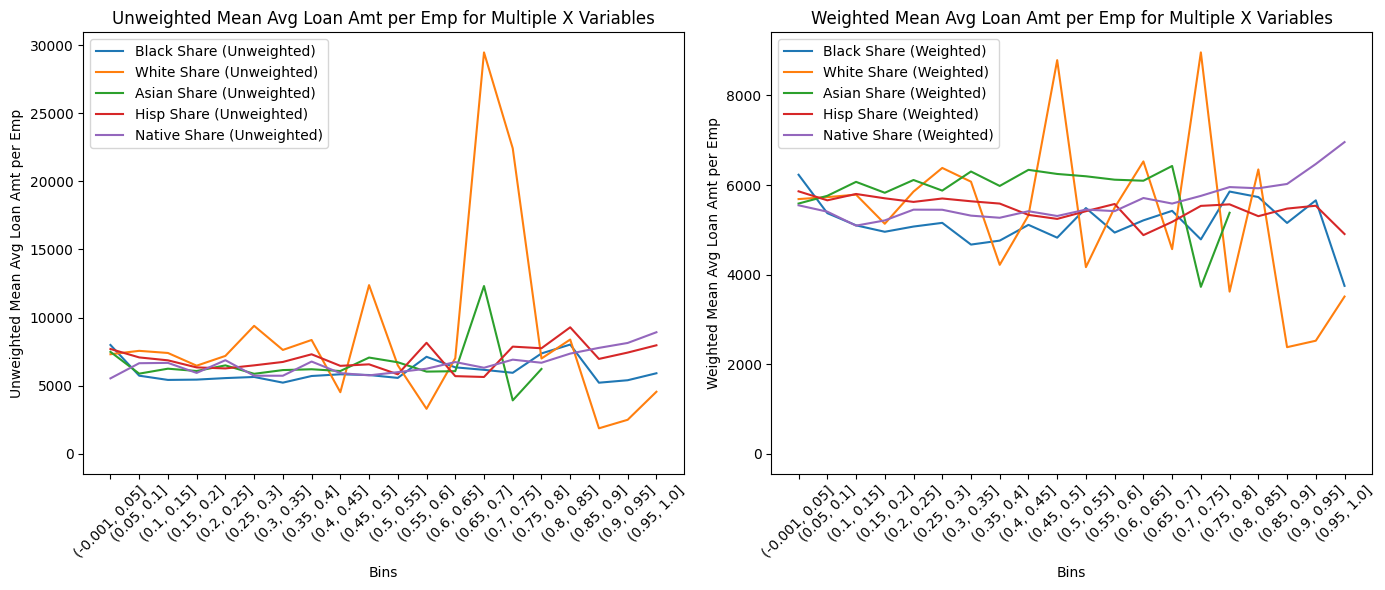

In [40]:
plot_multi_binned_means(stats_df, ["Black Share",
                             "White Share",
                             "Asian Share",
                             "Hisp Share",
                             "Native Share"], "Avg Loan Amt per Emp", "Total Pop")

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')


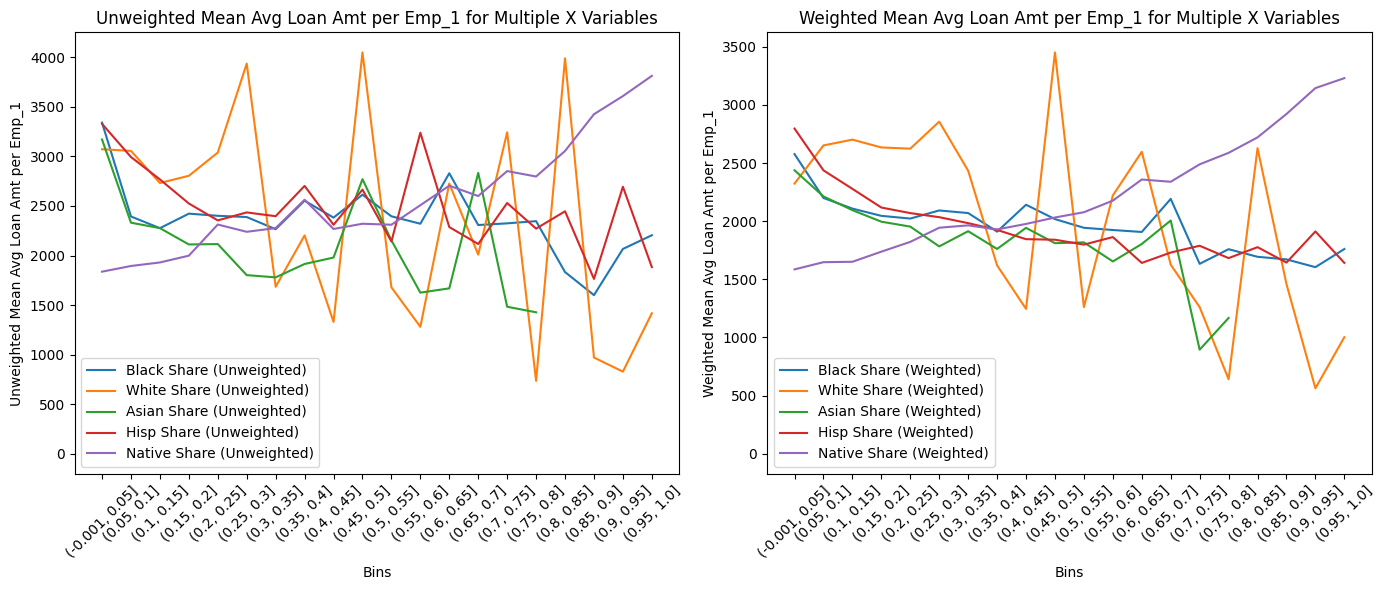

In [41]:
plot_multi_binned_means(stats_df, ["Black Share",
                             "White Share",
                             "Asian Share",
                             "Hisp Share",
                             "Native Share"], "Avg Loan Amt per Emp_1", "Total Pop")

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')


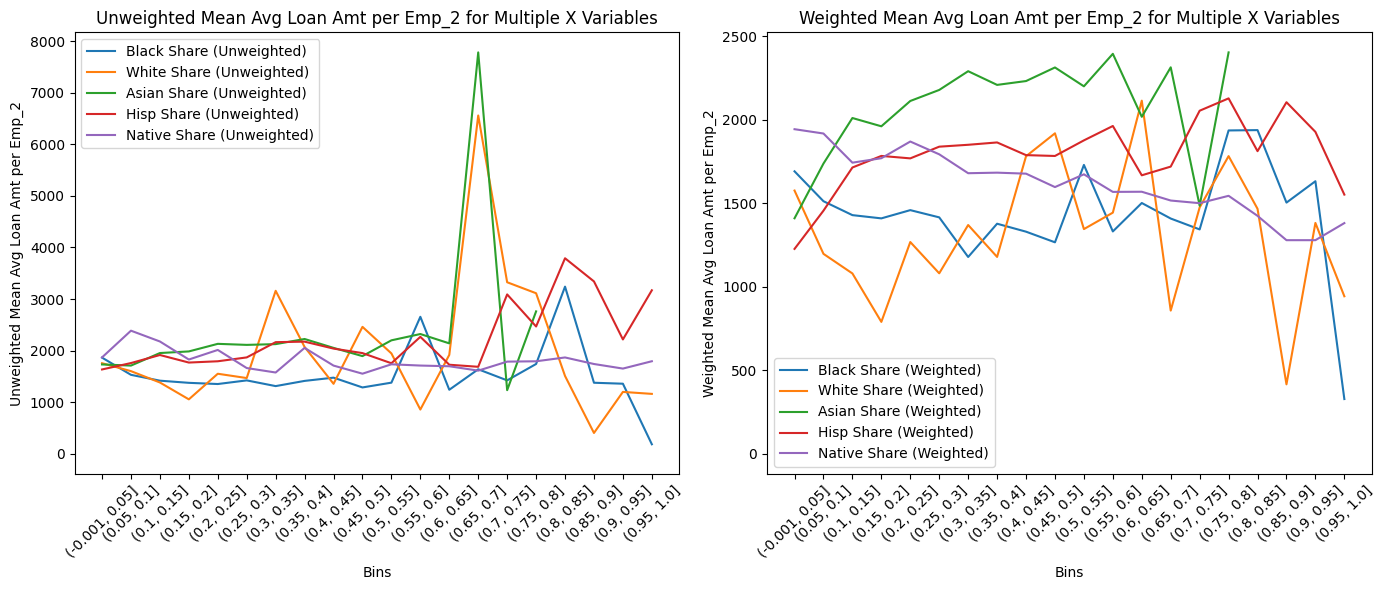

In [42]:
plot_multi_binned_means(stats_df, ["Black Share",
                             "White Share",
                             "Asian Share",
                             "Hisp Share",
                             "Native Share"], "Avg Loan Amt per Emp_2", "Total Pop")

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')


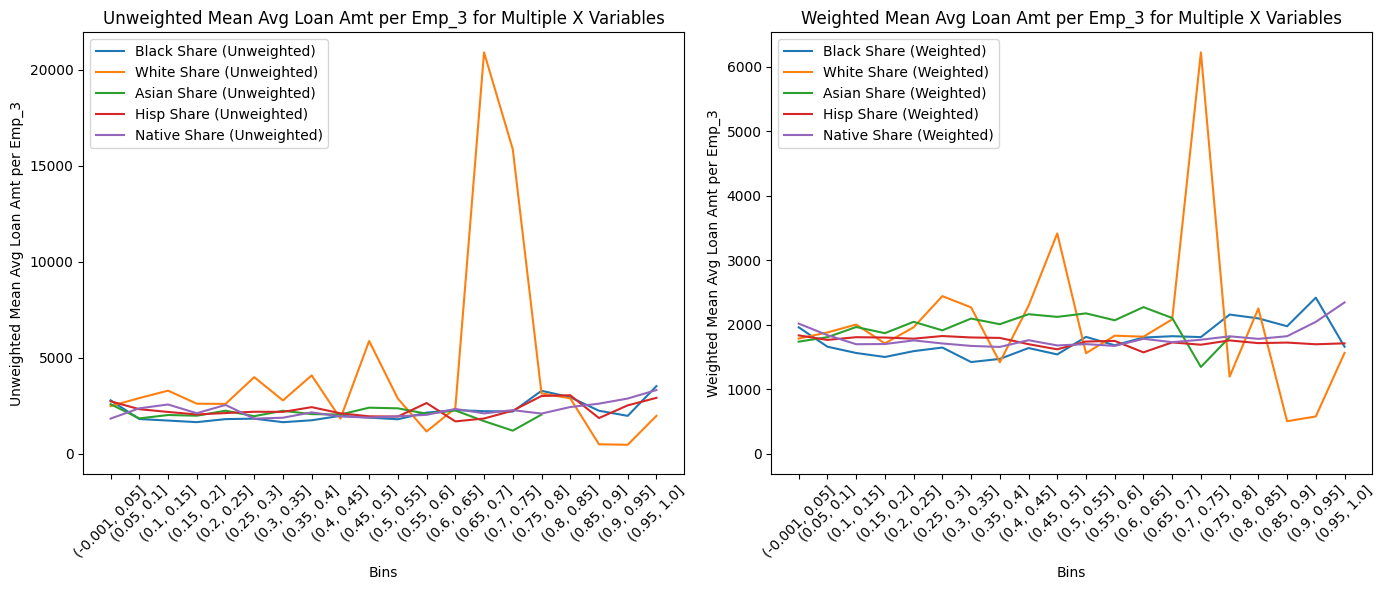

In [43]:
plot_multi_binned_means(stats_df, ["Black Share",
                             "White Share",
                             "Asian Share",
                             "Hisp Share",
                             "Native Share"], "Avg Loan Amt per Emp_3", "Total Pop")

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col

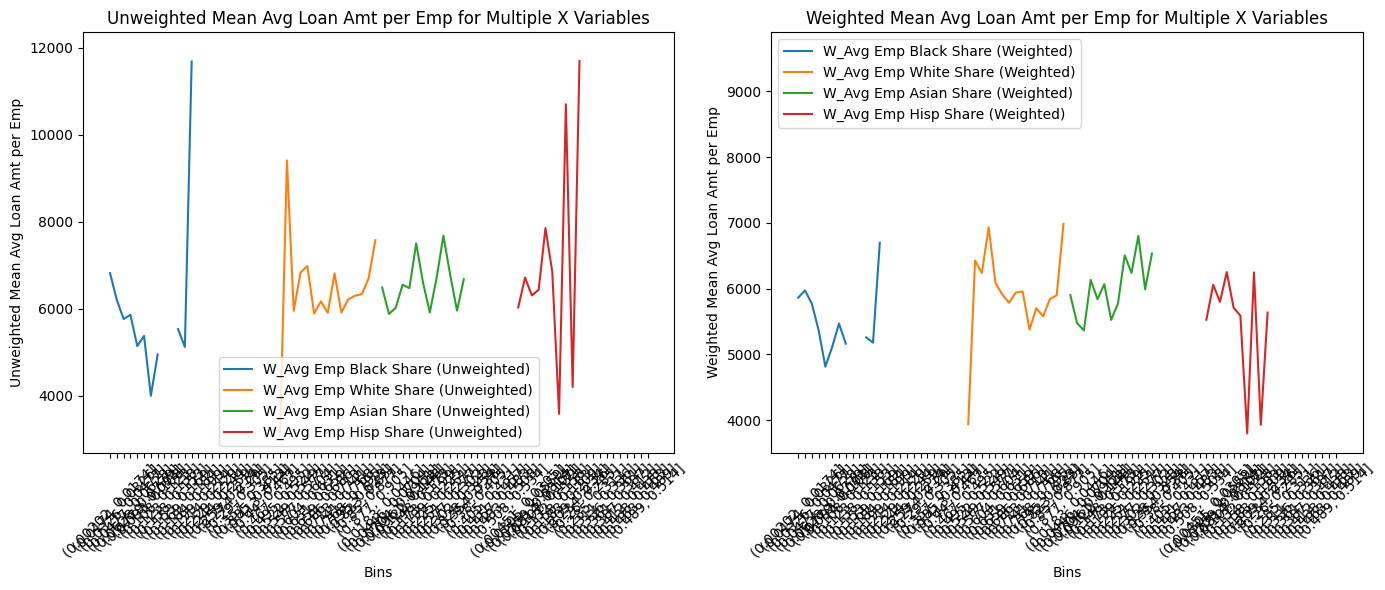

In [44]:
plot_multi_binned_means(stats_df, ["W_Avg Emp Black Share",
                                   "W_Avg Emp White Share",
                                   "W_Avg Emp Asian Share",
                                   "W_Avg Emp Hisp Share"], "Avg Loan Amt per Emp", "Total Pop")

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col

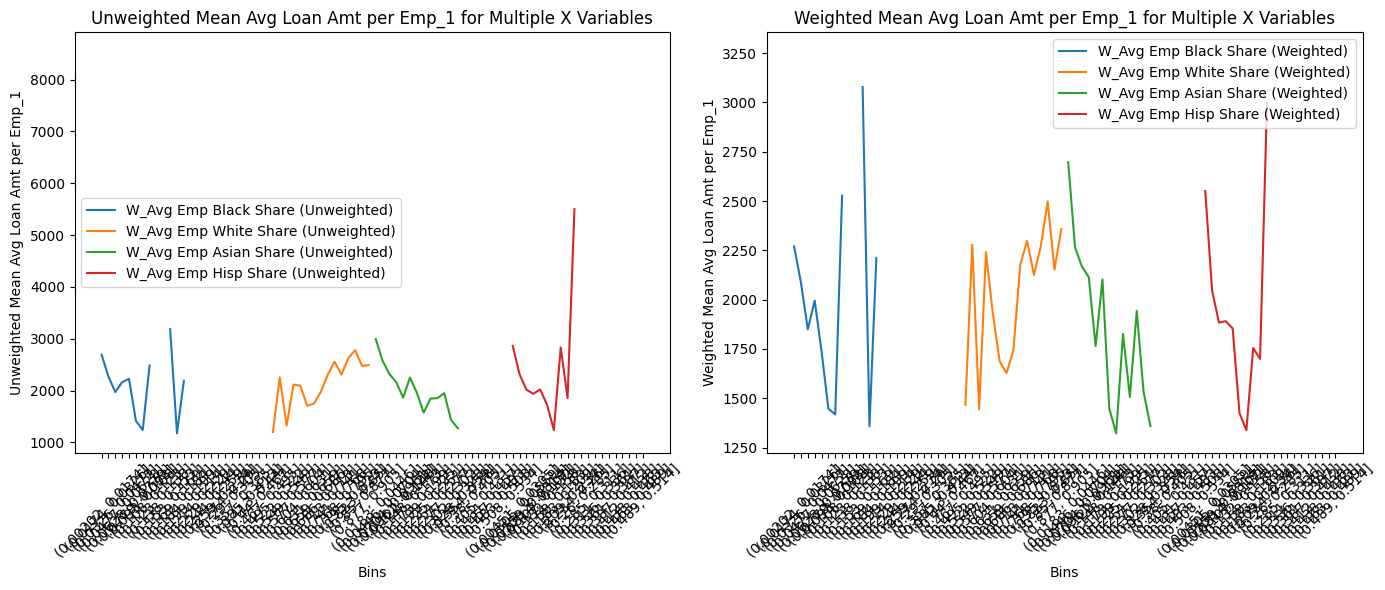

In [45]:
plot_multi_binned_means(stats_df, ["W_Avg Emp Black Share",
                                   "W_Avg Emp White Share",
                                   "W_Avg Emp Asian Share",
                                   "W_Avg Emp Hisp Share"], "Avg Loan Amt per Emp_1", "Total Pop")

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col

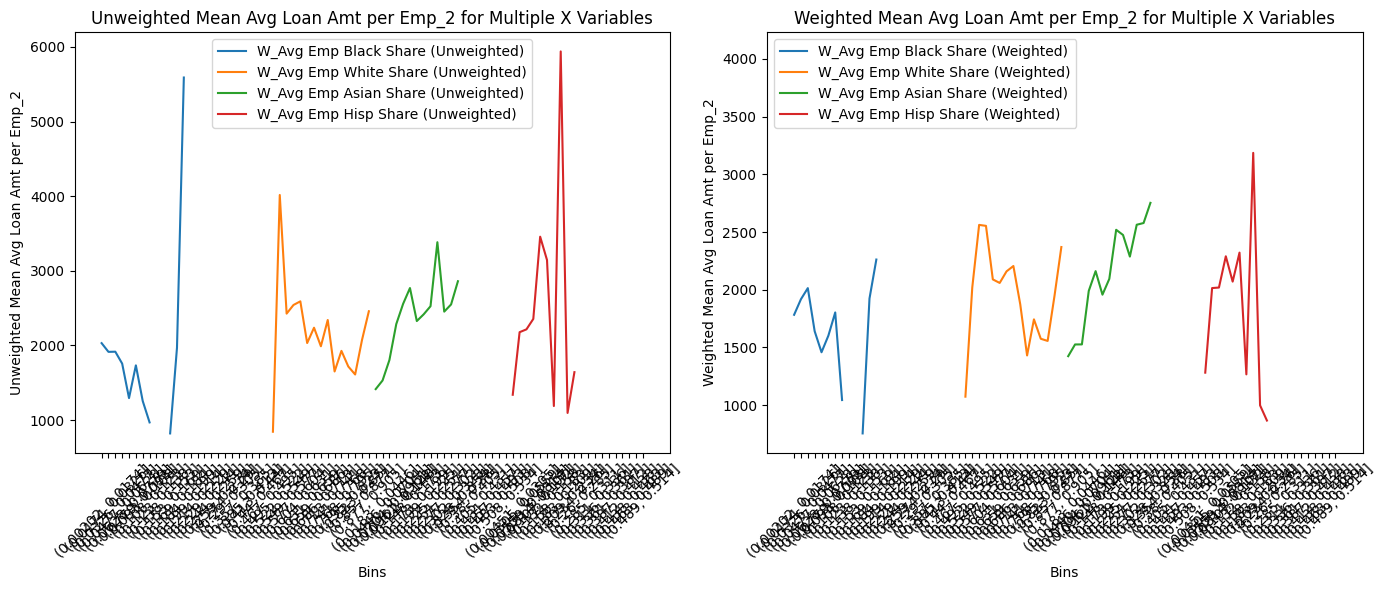

In [46]:
plot_multi_binned_means(stats_df, ["W_Avg Emp Black Share",
                                   "W_Avg Emp White Share",
                                   "W_Avg Emp Asian Share",
                                   "W_Avg Emp Hisp Share"], "Avg Loan Amt per Emp_2", "Total Pop")

C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
C:\Users\hthog\AppData\Local\Temp\ipykernel_25528\874548642.py:25: RuntimeWarning: invalid value encountered in double_scalars
  grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col

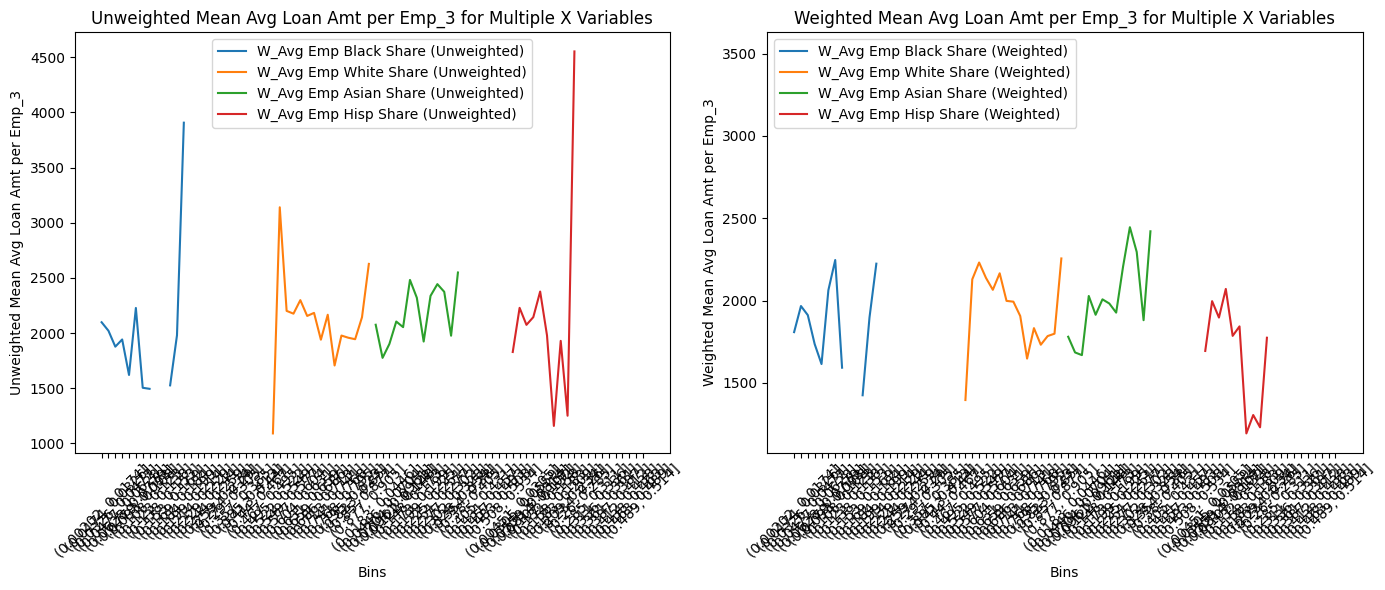

In [47]:
plot_multi_binned_means(stats_df, ["W_Avg Emp Black Share",
                                   "W_Avg Emp White Share",
                                   "W_Avg Emp Asian Share",
                                   "W_Avg Emp Hisp Share"], "Avg Loan Amt per Emp_3", "Total Pop")